# Case Study_Marketing Dataset:
* Analysis
* Apply K mean Clustering
* Apply PCA
* Apply Autoencoder

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
url = 'https://raw.githubusercontent.com/Sofiaanjum/Customer-Segmentation/main/marketing_campaign.xlsx'
df = pd.read_excel(url)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df[df['Income'] == 666666.00]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


#### Part-02 Visualizing the dataset

<Axes: >

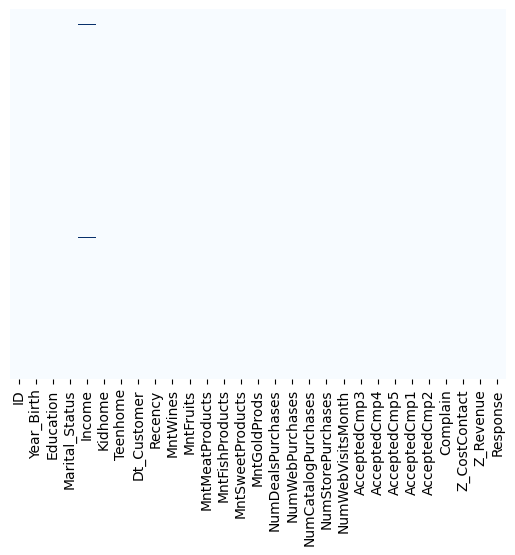

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [12]:
df.loc[(df['Income'].isnull() == True), 'Income'] = df['Income'].mean()

<Axes: >

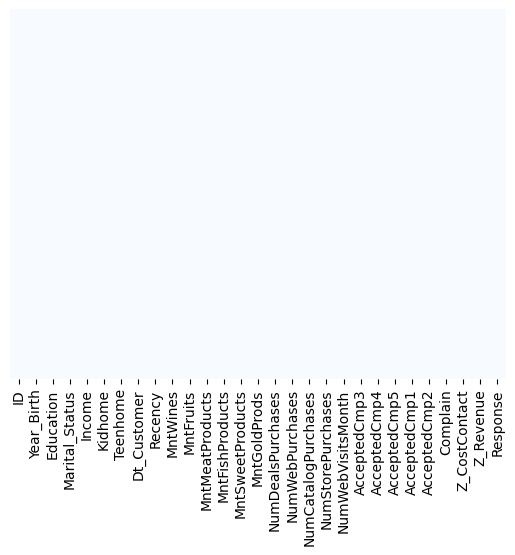

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [14]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [15]:
encoding = {'Single': 0, 'YOLO': 9, 'Together': 1, 'Married':2, 'Divorced':3, 'Widow': 4, 'Alone': 5, 'Absurd': 6}
df['Marital_Status'] = df['Marital_Status'].map(encoding)

In [16]:
encoding1 = {'Graduation': 0, 'PhD': 1, 'Master':2, 'Basic':3, '2n Cycle': 4}
df['Education'] = df['Education'].map(encoding1)

In [17]:
df_final = df.drop(['Dt_Customer', 'ID'], axis=1)

In [18]:
df_final = df_final.astype(int)

In [19]:
df_final.dtypes

Year_Birth             int64
Education              int64
Marital_Status         int64
Income                 int64
Kidhome                int64
Teenhome               int64
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
AcceptedCmp3           int64
AcceptedCmp4           int64
AcceptedCmp5           int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Complain               int64
Z_CostContact          int64
Z_Revenue              int64
Response               int64
dtype: object

In [20]:
df_final.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,0,0,58138,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,0,0,46344,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,0,1,71613,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,0,1,26646,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,1,2,58293,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


<ipython-input-21-3758751574b4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-21-3758751574b4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final.columns[i]]

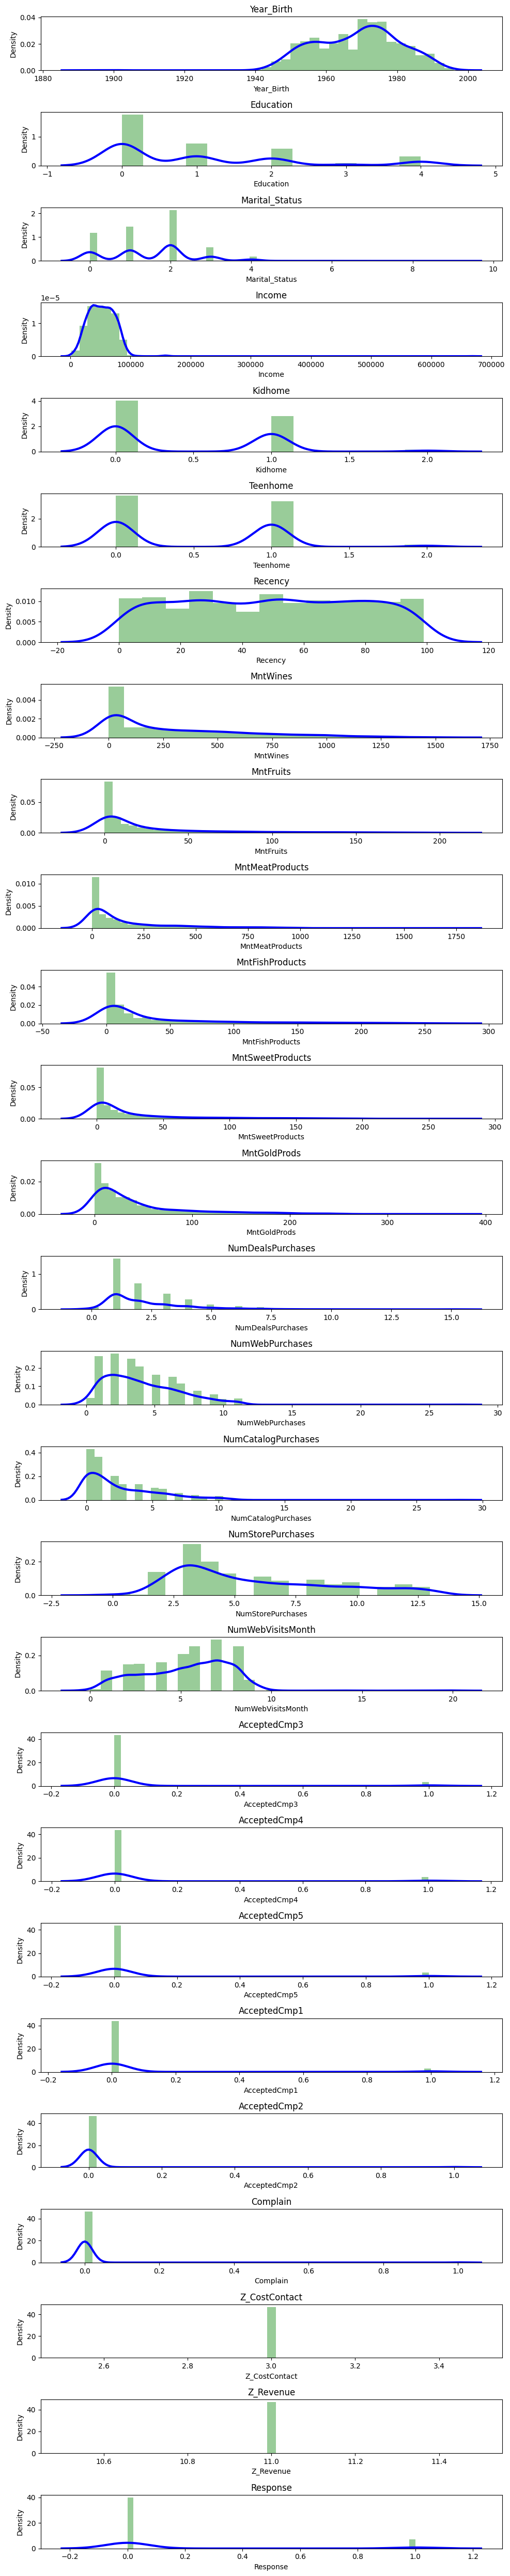

In [21]:
plt.figure(figsize=(10,50))
for i in range(len(df_final.columns)):
  plt.subplot(27, 1, i+1)
  sns.distplot(df_final[df_final.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df_final.columns[i])

plt.tight_layout()

<ipython-input-22-3523ffb10bc3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['Income'], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})


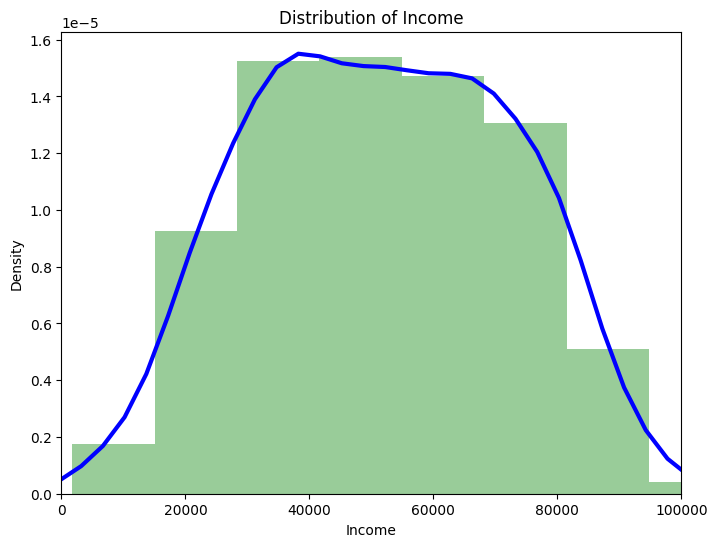

In [22]:
plt.figure(figsize=(8, 6))
sns.distplot(df_final['Income'], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
plt.xlim(0, 100000)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Density")
plt.show()

<Axes: >

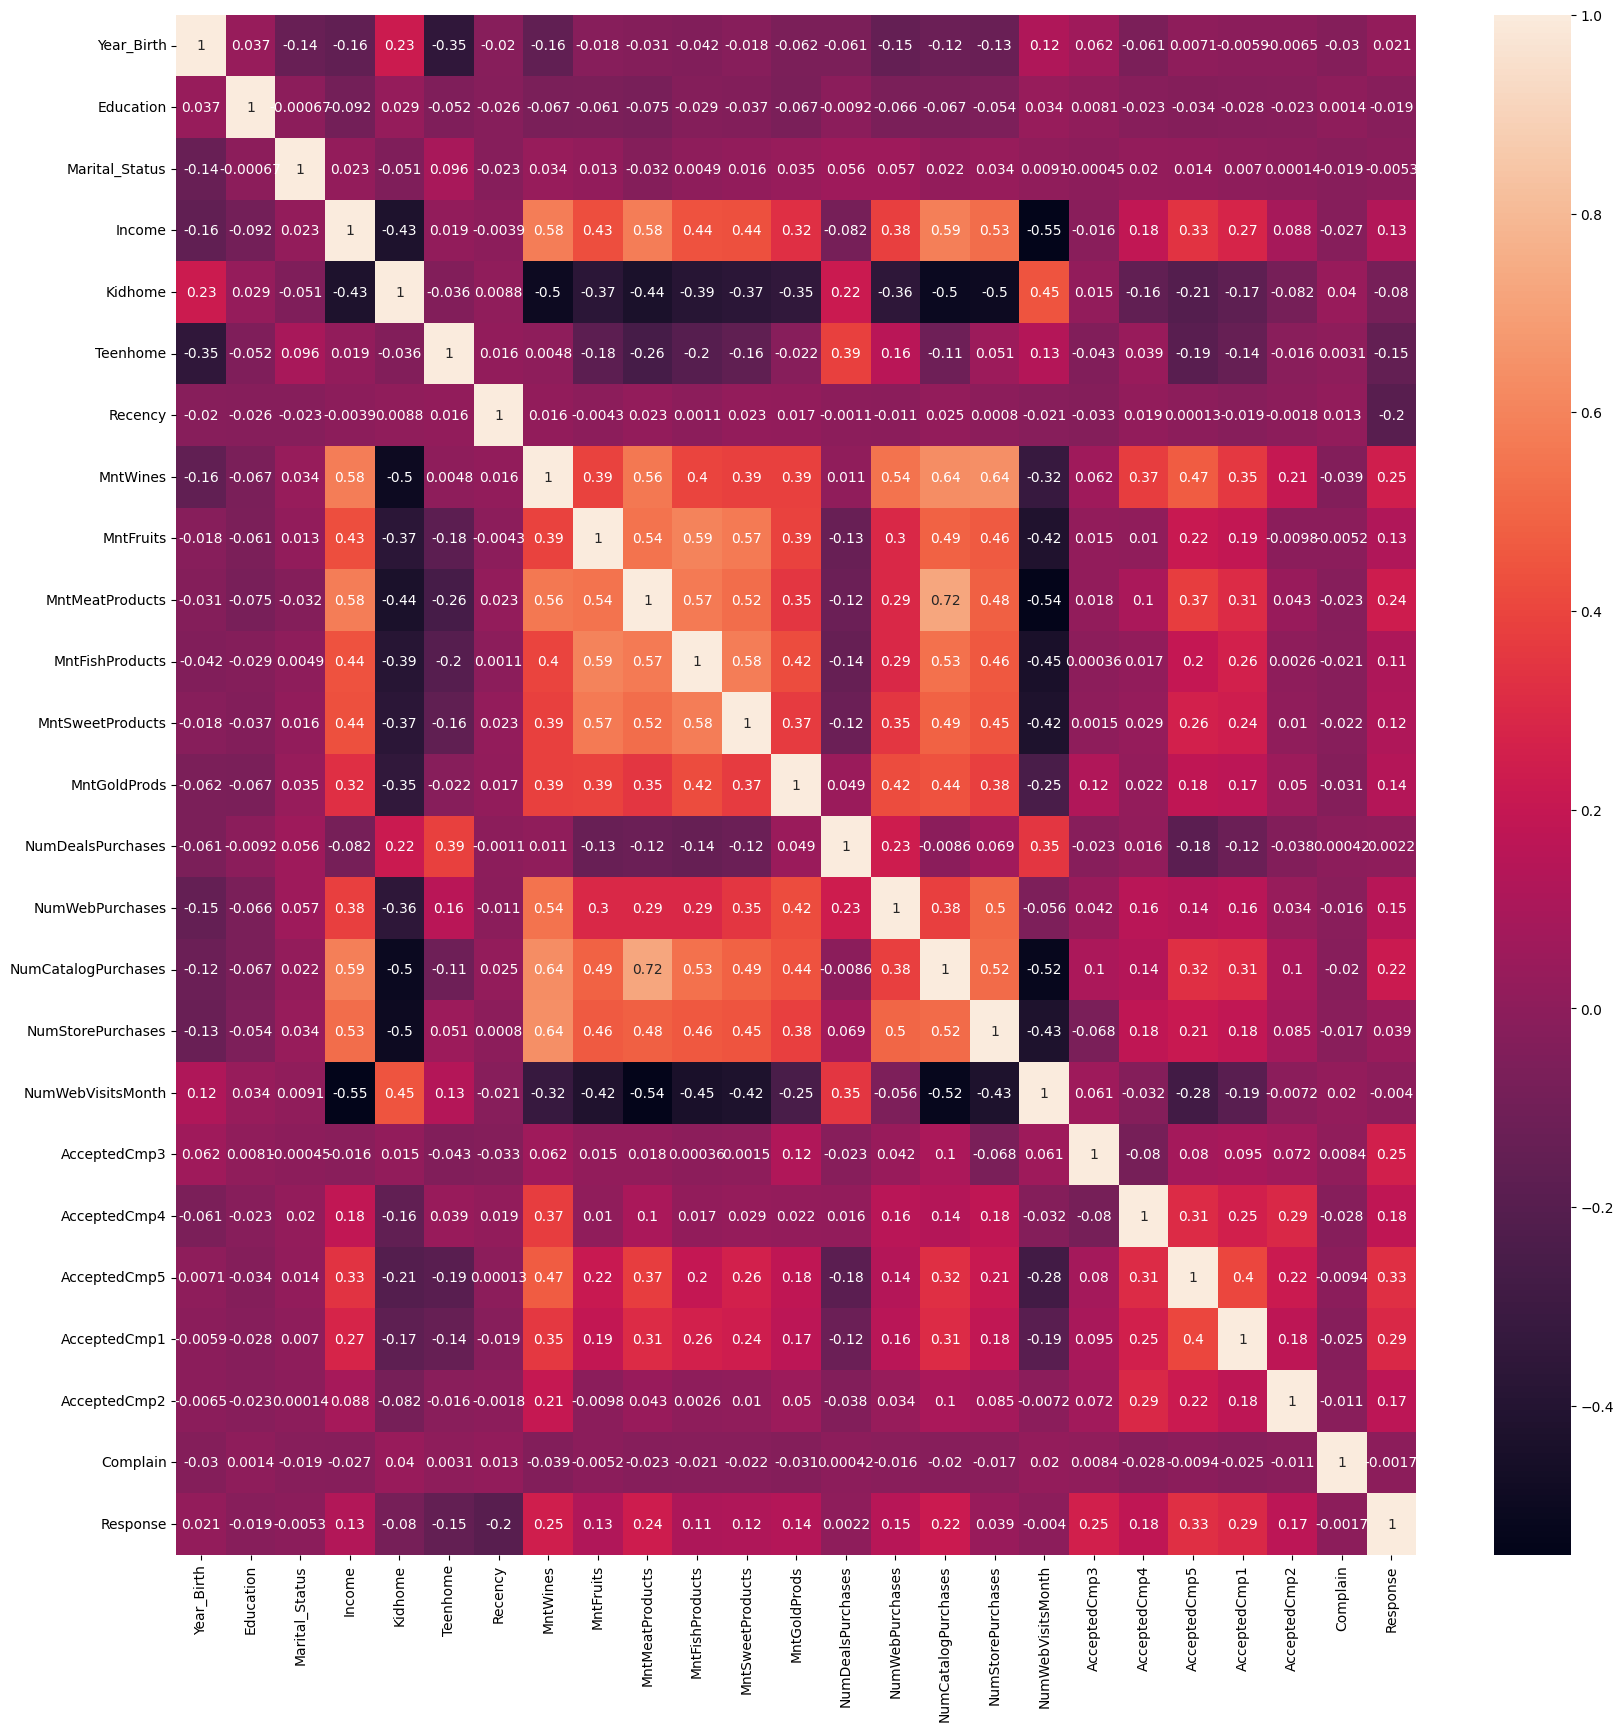

In [23]:
df_corr = df_final.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)
correlations = df_corr.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

### Finding the clusters

In [24]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

In [25]:
df_scaled.shape

(2240, 27)

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

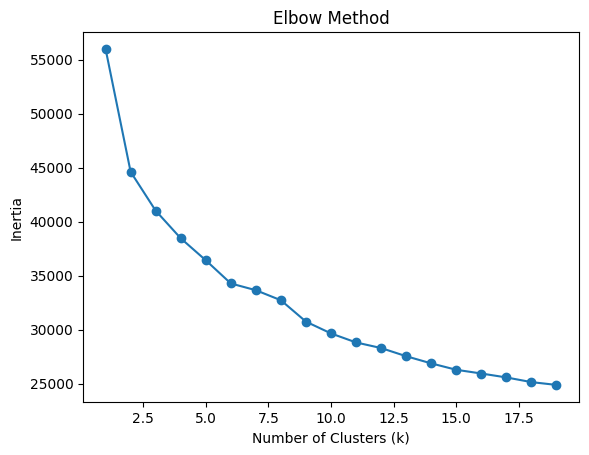

In [27]:
k_values = range(1, 20)
#inertia_values = []
scores_1 = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)
    
   # Plot the inertia values
plt.plot(k_values, scores_1, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Applying the clusters

In [30]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
kmeans.cluster_centers_.shape

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=df_final.columns)
cluster_centers


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.013629,-0.300938,0.150477,0.669660,-0.645722,-0.095779,0.049777,0.399631,1.887127,0.650153,...,-0.654156,-0.149954,-0.191872,-0.280140,-0.104535,-0.116510,-0.097282,0.0,0.0,-0.242298
1,0.800167,0.153603,-0.156270,-0.896810,0.766223,-0.910388,-0.014474,-0.795996,-0.490265,-0.615610,...,0.696822,0.087803,-0.277092,-0.280140,-0.254895,-0.116510,-0.097282,0.0,0.0,-0.075754
2,-0.387023,-0.082373,0.107495,0.257321,-0.458249,0.838903,-0.041652,0.594200,-0.179187,-0.124349,...,0.179098,-0.010814,0.295846,-0.264298,-0.094322,-0.116510,-0.097282,0.0,0.0,-0.089342
3,0.007692,-0.110267,0.067105,1.199089,-0.724114,-0.717472,0.019246,1.649353,0.870870,1.415238,...,-1.047362,0.191261,1.011089,3.464884,1.429824,-0.116510,-0.097282,0.0,0.0,1.109256
4,-0.056126,-0.197940,0.001235,0.751335,-0.701366,-0.133935,-0.015289,1.767286,-0.083883,0.369353,...,-0.061766,0.618142,2.508016,1.901402,1.504713,8.582929,-0.097282,0.0,0.0,1.453027
5,-0.309694,0.014206,-0.196375,-0.279838,0.413300,0.032254,0.136008,-0.400971,-0.053106,-0.241392,...,0.203209,0.086505,-0.283830,-0.096817,-0.262111,-0.116510,10.279429,0.0,0.0,-0.017547
6,-0.097846,0.099783,-0.158585,1.009785,-0.773407,-0.827442,-0.020838,0.670760,0.556477,1.563781,...,-1.191303,0.011277,-0.192825,-0.280140,0.403900,-0.116510,-0.097282,0.0,0.0,0.274864
7,-0.430701,0.023162,0.073037,-0.381549,0.443508,0.831117,0.033998,-0.707656,-0.545240,-0.624557,...,0.197427,-0.121238,-0.219546,-0.280140,-0.262111,-0.116510,-0.097282,0.0,0.0,-0.260594


In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_final.columns])
cluster_centers


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1968.642512,0.603865,1.661836,69010.318841,0.096618,0.454106,50.550725,438.420290,101.342995,313.666667,...,3.729469,0.033816,0.024155,-1.387779e-16,3.864734e-02,-1.908196e-17,1.387779e-17,3.0,11.0,0.062802
1,1978.392920,1.175221,1.329204,29798.125664,0.856637,0.010619,48.690265,36.065487,6.807080,28.028319,...,7.007080,0.095575,0.001770,-6.938894e-17,1.769912e-03,-1.734723e-17,5.551115e-17,3.0,11.0,0.122124
2,1964.168724,0.878601,1.615226,58688.553498,0.197531,0.962963,47.903292,503.897119,19.176955,138.888889,...,5.751029,0.069959,0.152263,4.115226e-03,4.115226e-02,-5.377643e-17,5.030698e-17,3.0,11.0,0.117284
3,1968.897959,0.843537,1.571429,82263.088435,0.054422,0.115646,49.666667,858.979592,60.931973,486.319728,...,2.775510,0.122449,0.340136,9.727891e-01,4.149660e-01,-1.734723e-18,-1.734723e-18,3.0,11.0,0.544218
4,1968.133333,0.733333,1.500000,71054.833333,0.066667,0.433333,48.666667,898.666667,22.966667,250.300000,...,5.166667,0.233333,0.733333,5.666667e-01,4.333333e-01,1.000000e+00,-3.469447e-18,3.0,11.0,0.666667
5,1965.095238,1.000000,1.285714,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,...,5.809524,0.095238,0.000000,4.761905e-02,1.387779e-17,1.734723e-18,1.000000e+00,3.0,11.0,0.142857
6,1967.633466,1.107570,1.326693,77524.406375,0.027888,0.055777,48.505976,529.661355,48.430279,519.840637,...,2.426295,0.075697,0.023904,0.000000e+00,1.633466e-01,-2.949030e-17,2.428613e-17,3.0,11.0,0.247012
7,1963.645403,1.011257,1.577861,42696.228893,0.682927,0.958724,50.093809,65.793621,4.621013,26.009381,...,5.795497,0.041276,0.016886,0.000000e+00,-1.387779e-17,-3.642919e-17,5.377643e-17,3.0,11.0,0.056285


In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
cluster_centers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1968.642512,0.603865,1.661836,69010.318841,0.096618,0.454106,50.550725,438.420290,101.342995,313.666667,112.333333,95.855072,94.130435,1.917874,6.188406,4.652174,8.985507,3.729469,0.033816,0.024155,-1.387779e-16,3.864734e-02,-1.908196e-17,1.387779e-17,3.0,11.0,0.062802
1,1978.392920,1.175221,1.329204,29798.125664,0.856637,0.010619,48.690265,36.065487,6.807080,28.028319,9.909735,6.807080,18.129204,1.923894,2.311504,0.536283,3.157522,7.007080,0.095575,0.001770,-6.938894e-17,1.769912e-03,-1.734723e-17,5.551115e-17,3.0,11.0,0.122124
2,1964.168724,0.878601,1.615226,58688.553498,0.197531,0.962963,47.903292,503.897119,19.176955,138.888889,27.469136,20.736626,62.316872,3.835391,6.561728,3.288066,7.917695,5.751029,0.069959,0.152263,4.115226e-03,4.115226e-02,-5.377643e-17,5.030698e-17,3.0,11.0,0.117284
3,1968.897959,0.843537,1.571429,82263.088435,0.054422,0.115646,49.666667,858.979592,60.931973,486.319728,81.469388,68.877551,78.401361,1.013605,5.489796,6.000000,8.176871,2.775510,0.122449,0.340136,9.727891e-01,4.149660e-01,-1.734723e-18,-1.734723e-18,3.0,11.0,0.544218
4,1968.133333,0.733333,1.500000,71054.833333,0.066667,0.433333,48.666667,898.666667,22.966667,250.300000,38.733333,30.600000,66.400000,1.700000,4.900000,5.166667,8.166667,5.166667,0.233333,0.733333,5.666667e-01,4.333333e-01,1.000000e+00,-3.469447e-18,3.0,11.0,0.666667
5,1965.095238,1.000000,1.285714,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524,0.095238,0.000000,4.761905e-02,1.387779e-17,1.734723e-18,1.000000e+00,3.0,11.0,0.142857
6,1967.633466,1.107570,1.326693,77524.406375,0.027888,0.055777,48.505976,529.661355,48.430279,519.840637,97.960159,52.019920,65.749004,1.262948,4.494024,6.517928,8.019920,2.426295,0.075697,0.023904,0.000000e+00,1.633466e-01,-2.949030e-17,2.428613e-17,3.0,11.0,0.247012
7,1963.645403,1.011257,1.577861,42696.228893,0.682927,0.958724,50.093809,65.793621,4.621013,26.009381,6.731707,4.478424,15.005629,2.427767,2.281426,0.718574,3.579737,5.795497,0.041276,0.016886,0.000000e+00,-1.387779e-17,-3.642919e-17,5.377643e-17,3.0,11.0,0.056285


### **Assigning segment names to these clusters**

### Cluster -0 & 5: Both are old age groups with similar income and family structure. Cluster 0 consumes more meat products while cluster 5 spends more on fruits and vegetables. Cluster 0 responded to the campaigns in third offer while cluster 5 responded in third offer. 

### Cluster 0: Meat Lovers & Campaign responders
### Cluster 5: Health Conscious & Campaign responders

### **Segment names:**

#### Cluster 0: "Meat Lovers & Campaign Responders"
#### Cluster 1: "Younger & Lower Income"
#### Cluster 2: "Average Income & Moderate Spenders"
#### Cluster 3: "High Income & Family-Oriented"
#### Cluster 4: "Balanced Spenders"
#### Cluster 5: "Health Conscious & Campaign Responders"
#### Cluster 6: "High Income & Frequent Buyers"
#### Cluster 7: "High Income & Infrequent Buyers"

In [34]:
labels.shape

(2240,)

In [35]:
labels.max()

7

In [36]:
labels.min()

0

In [37]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 7, 3, 0], dtype=int32)

In [38]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df_final, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,1957,0,0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,6
1,1954,0,0,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,7
2,1965,0,1,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,1984,0,1,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,1981,1,2,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


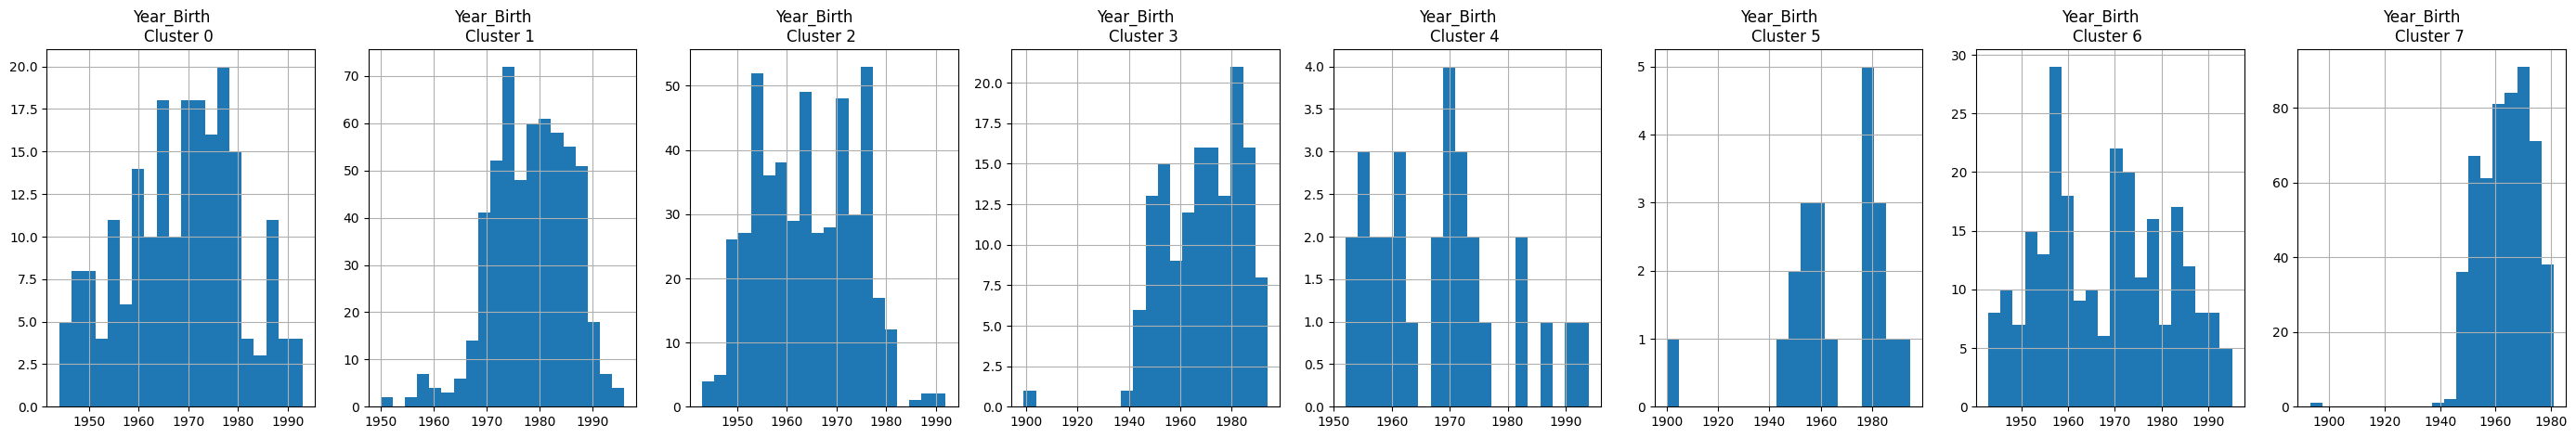

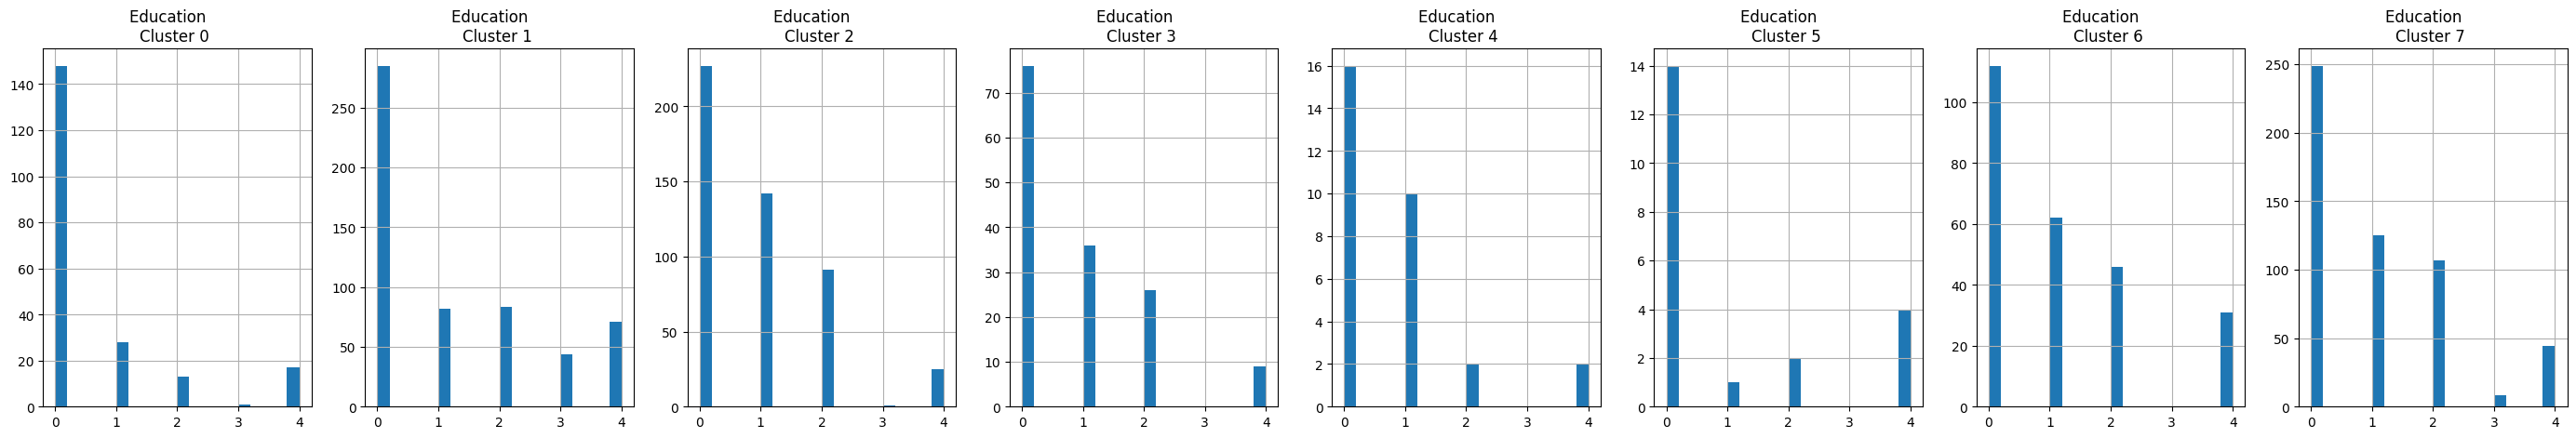

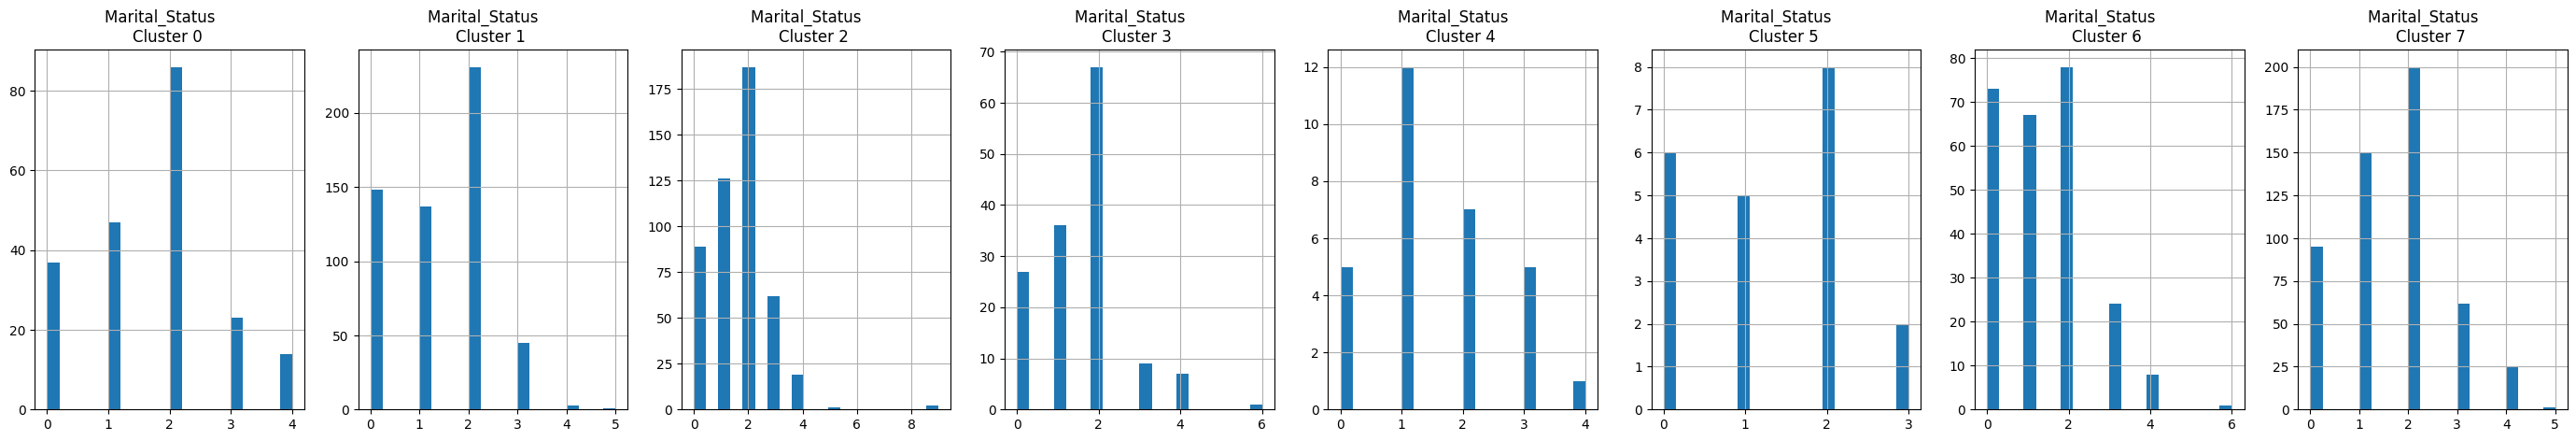

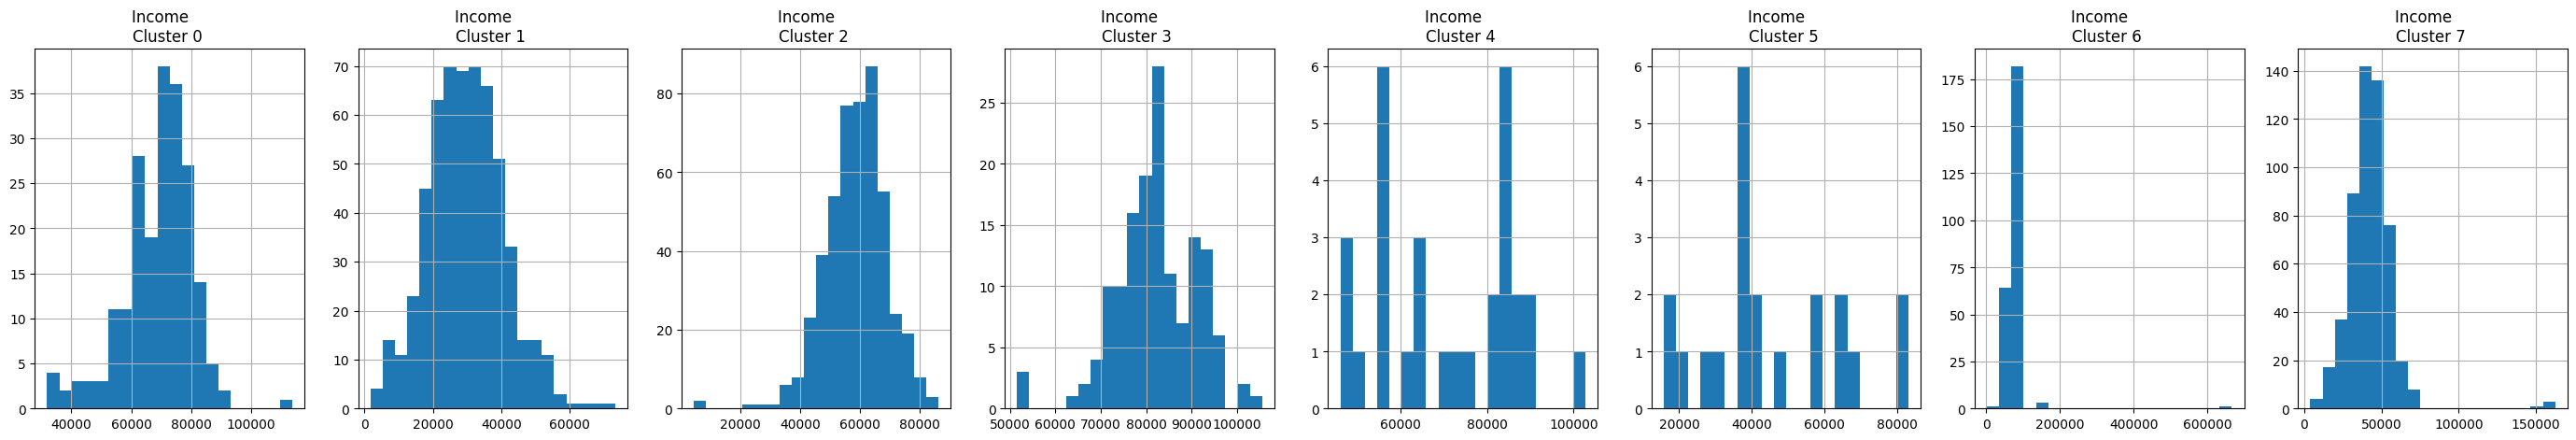

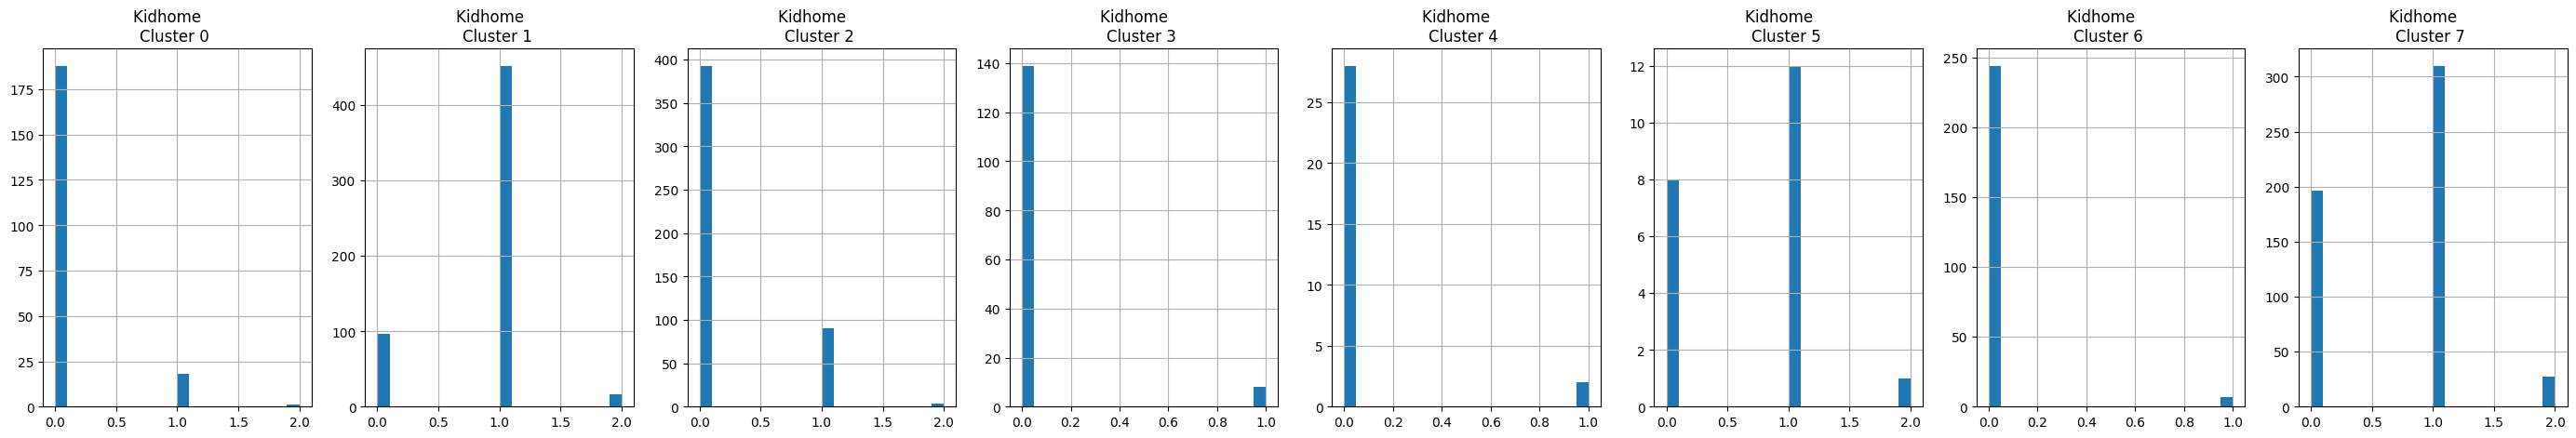

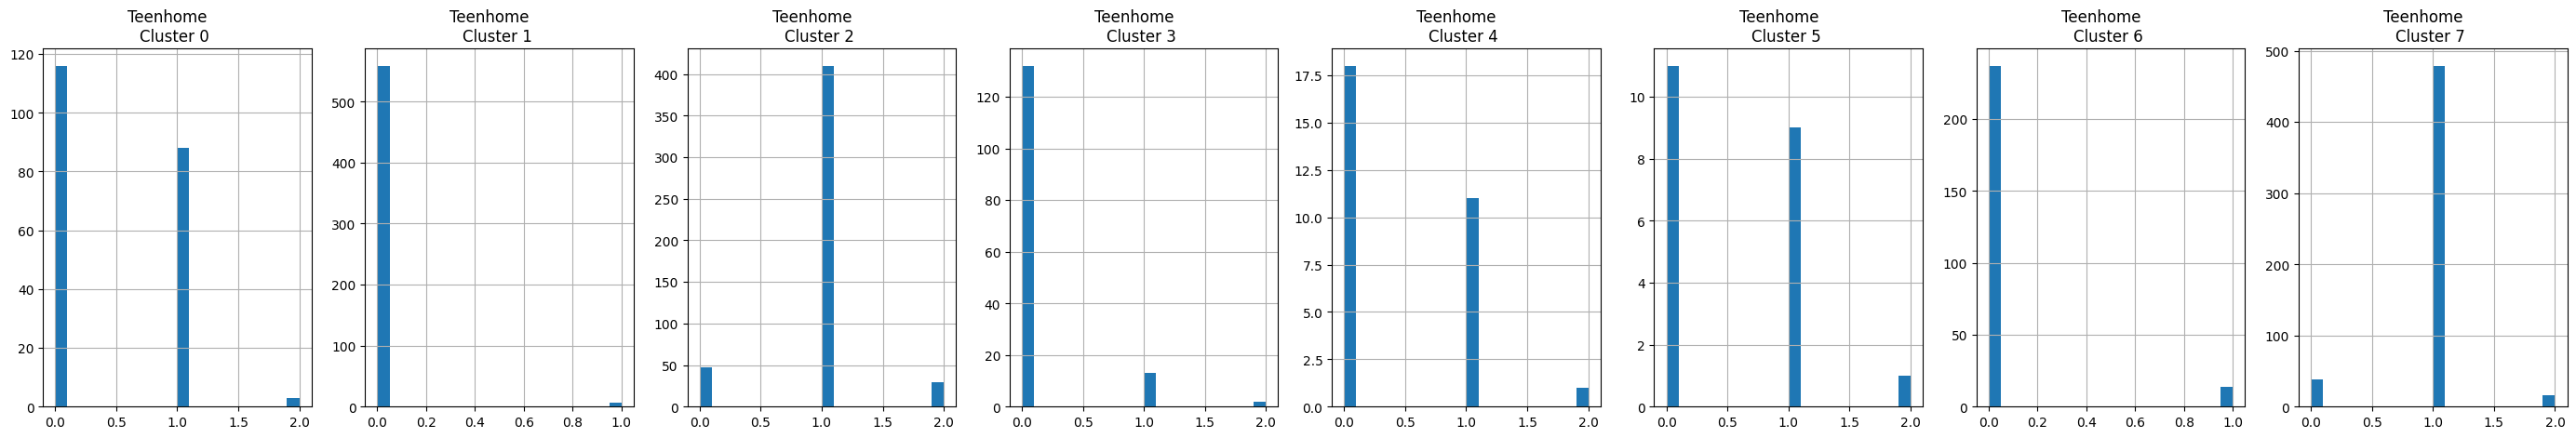

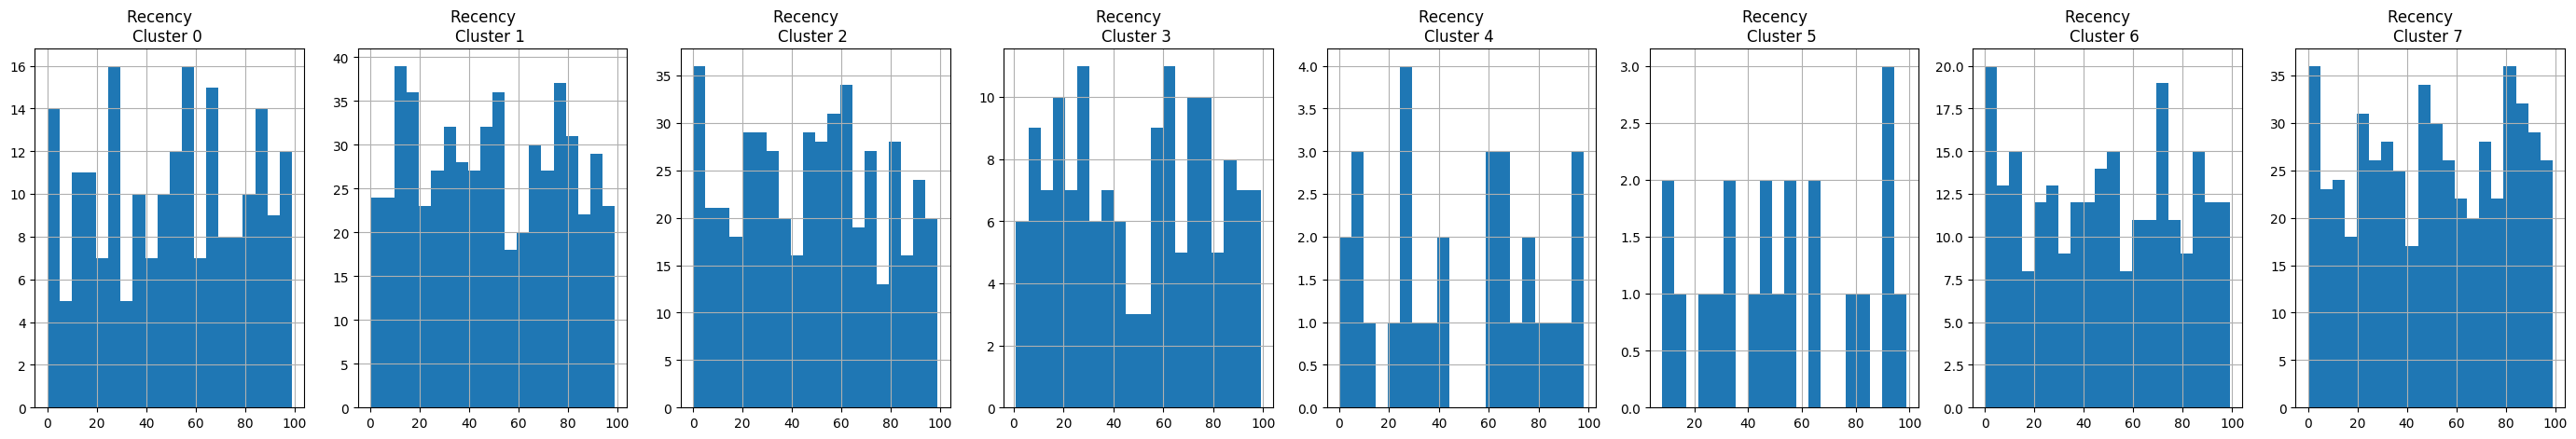

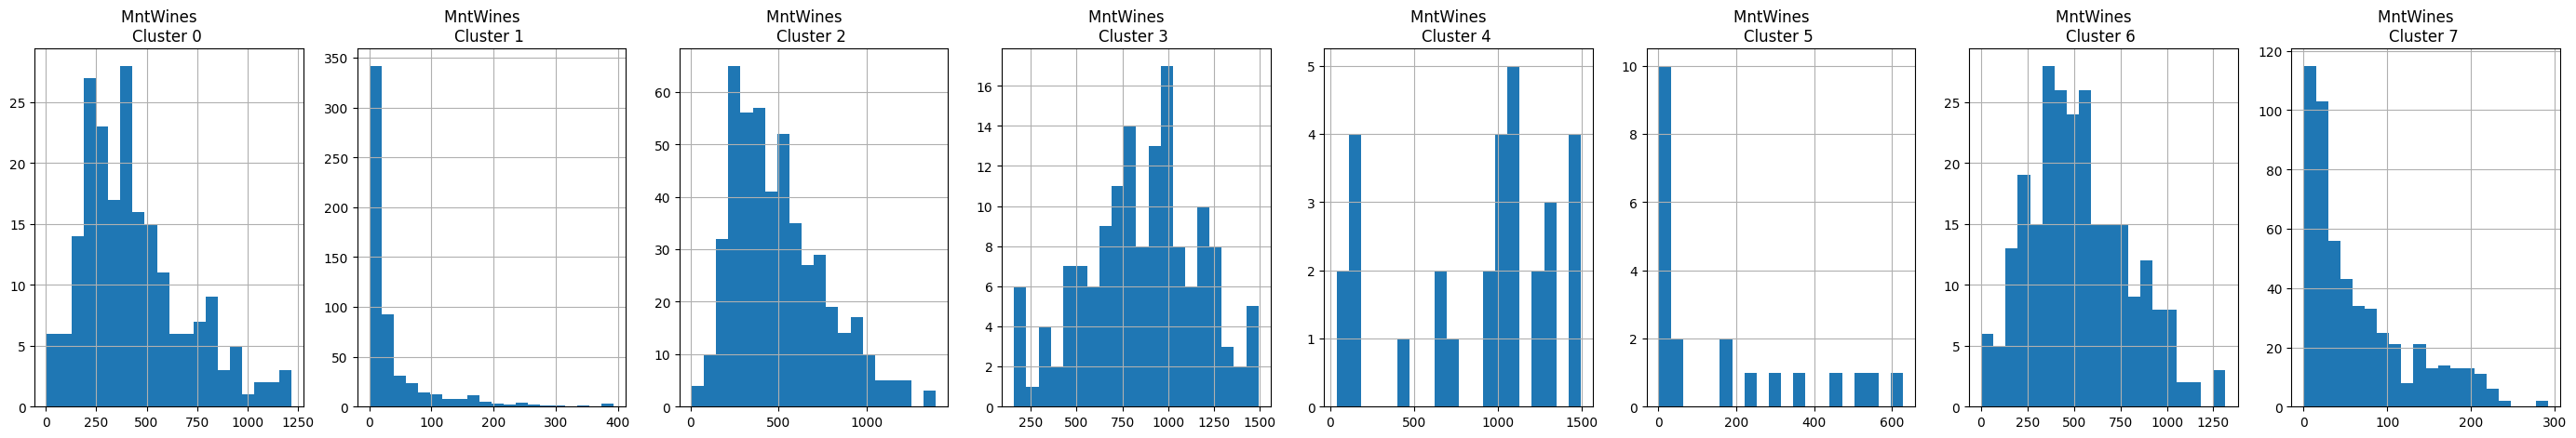

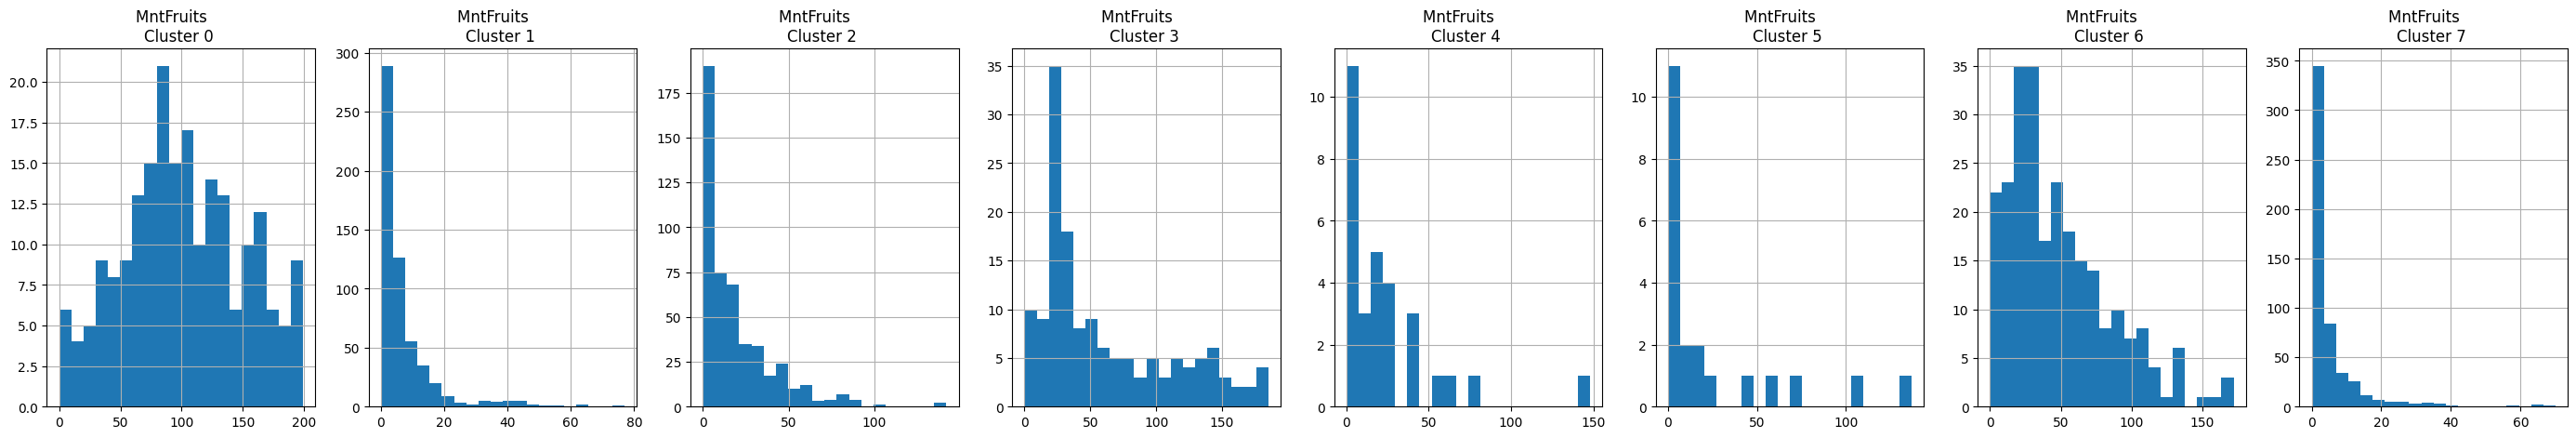

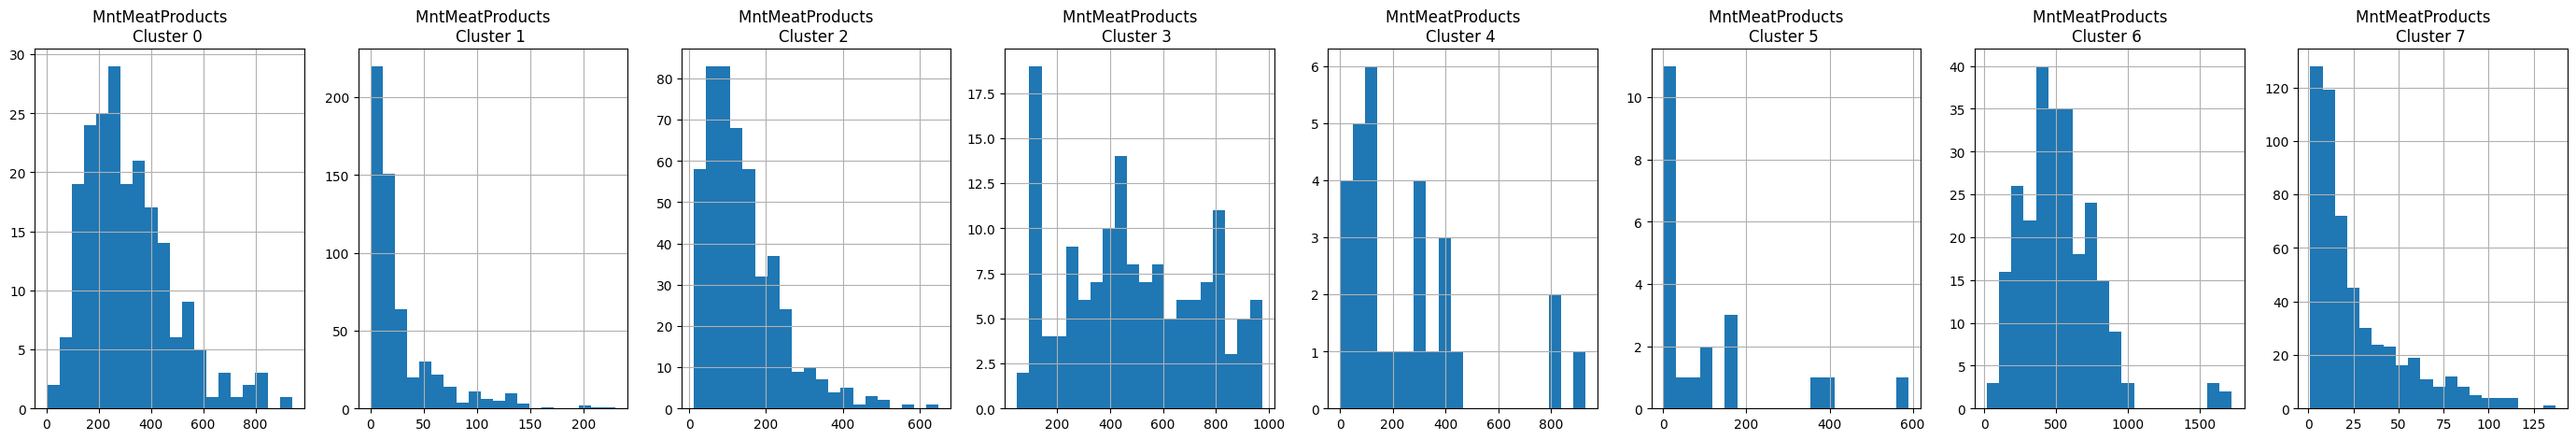

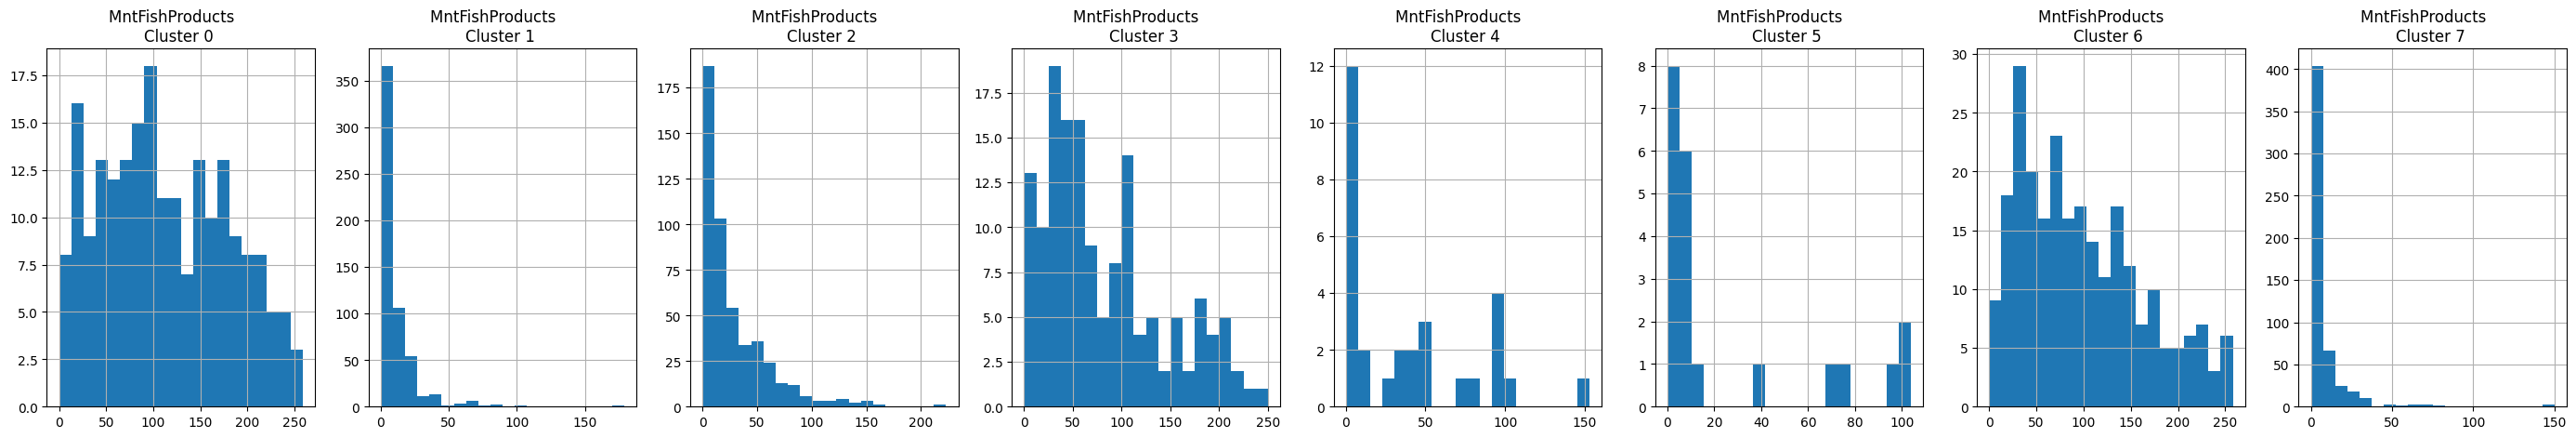

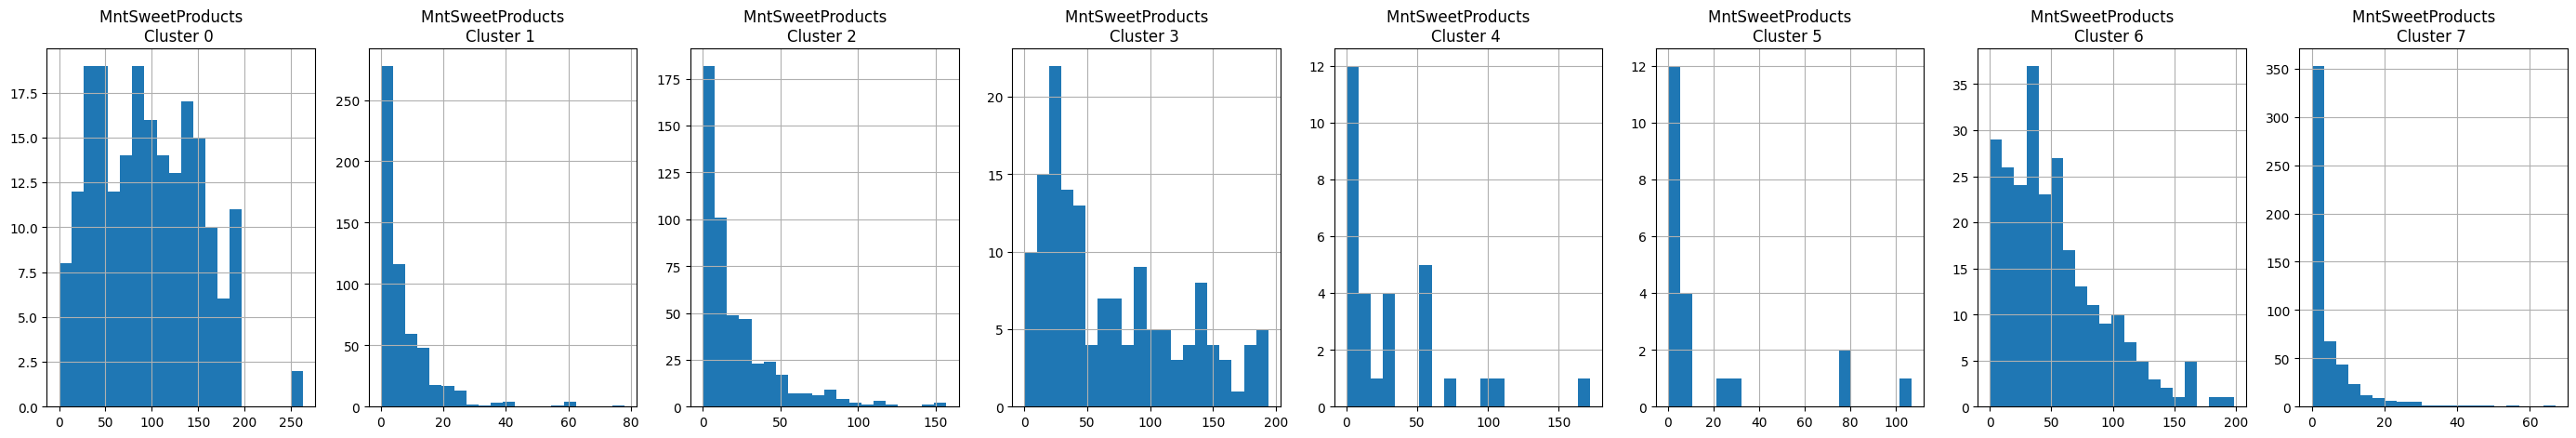

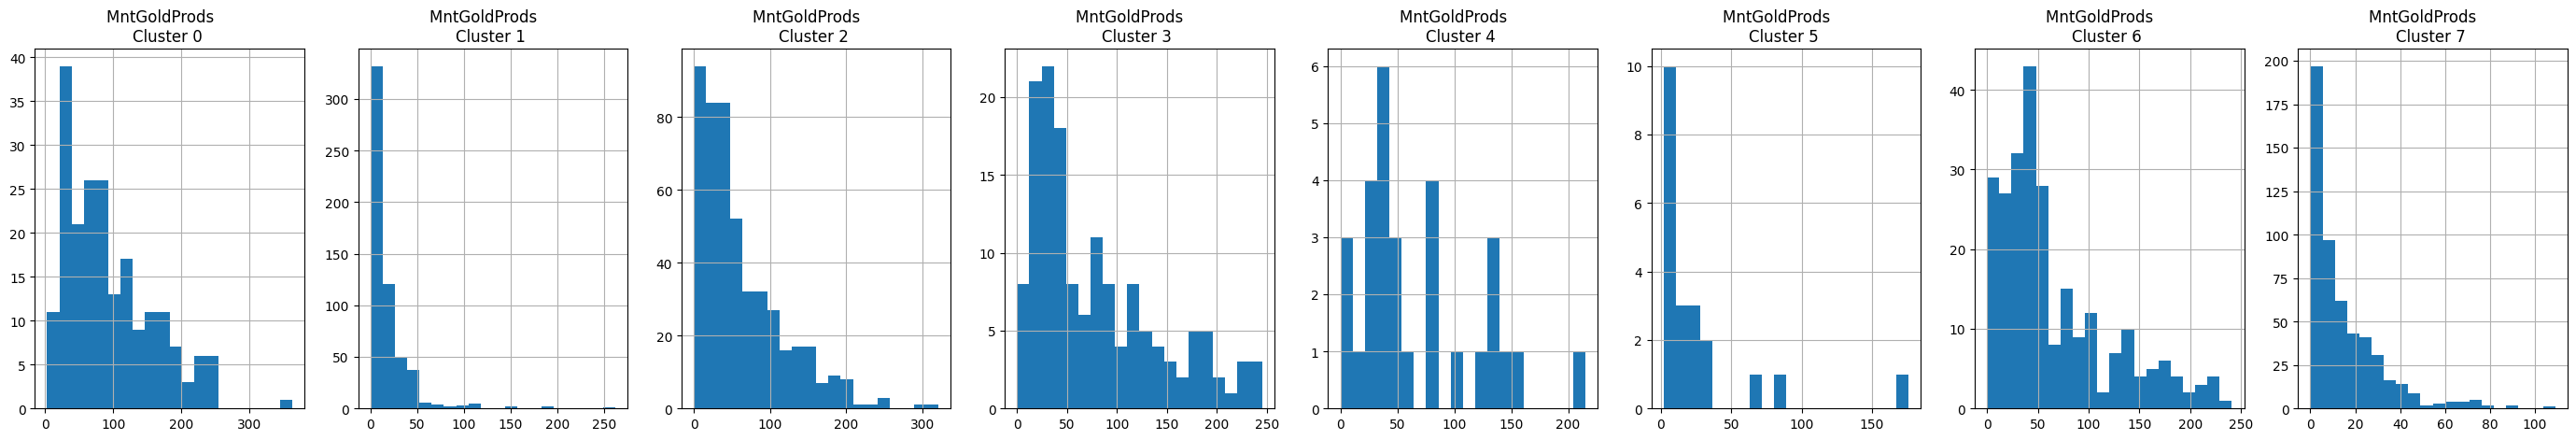

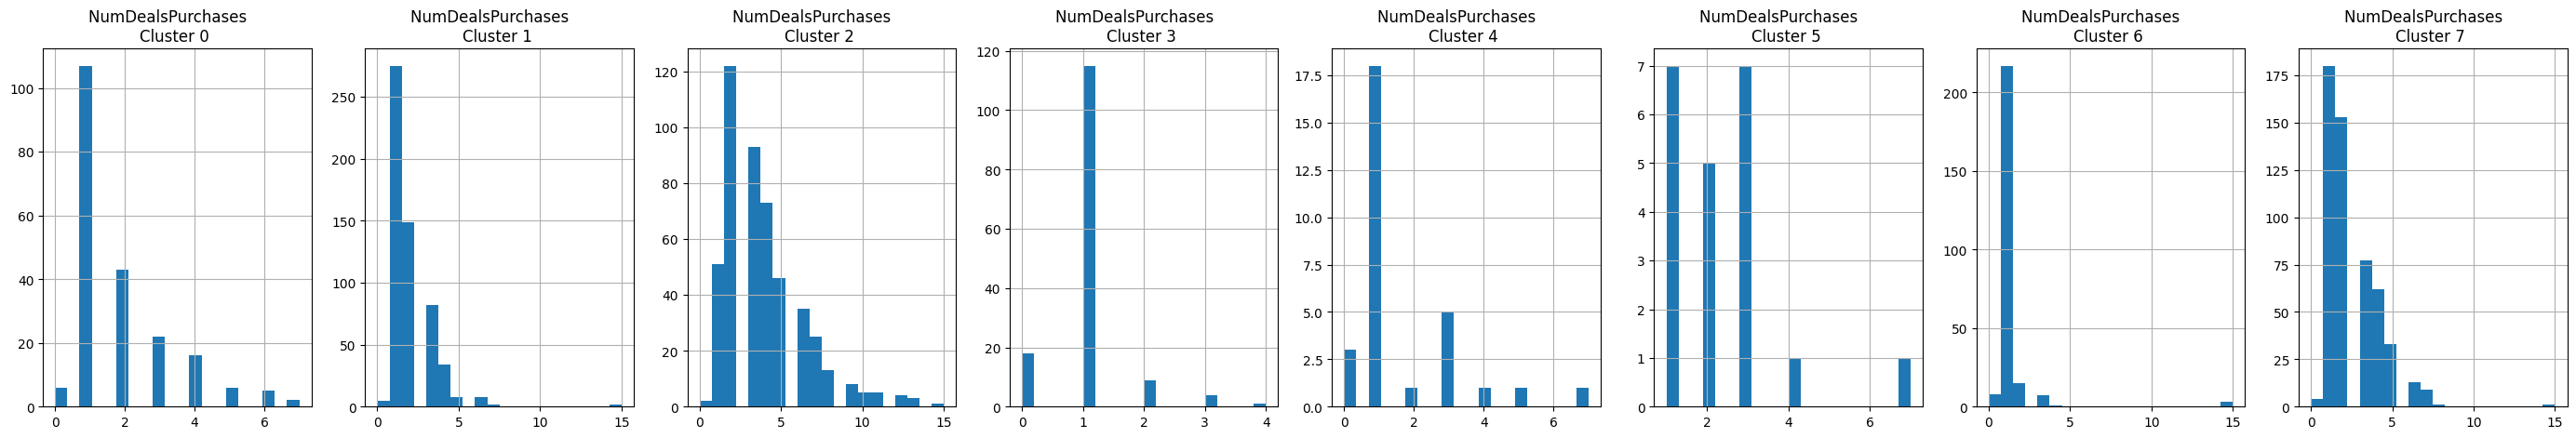

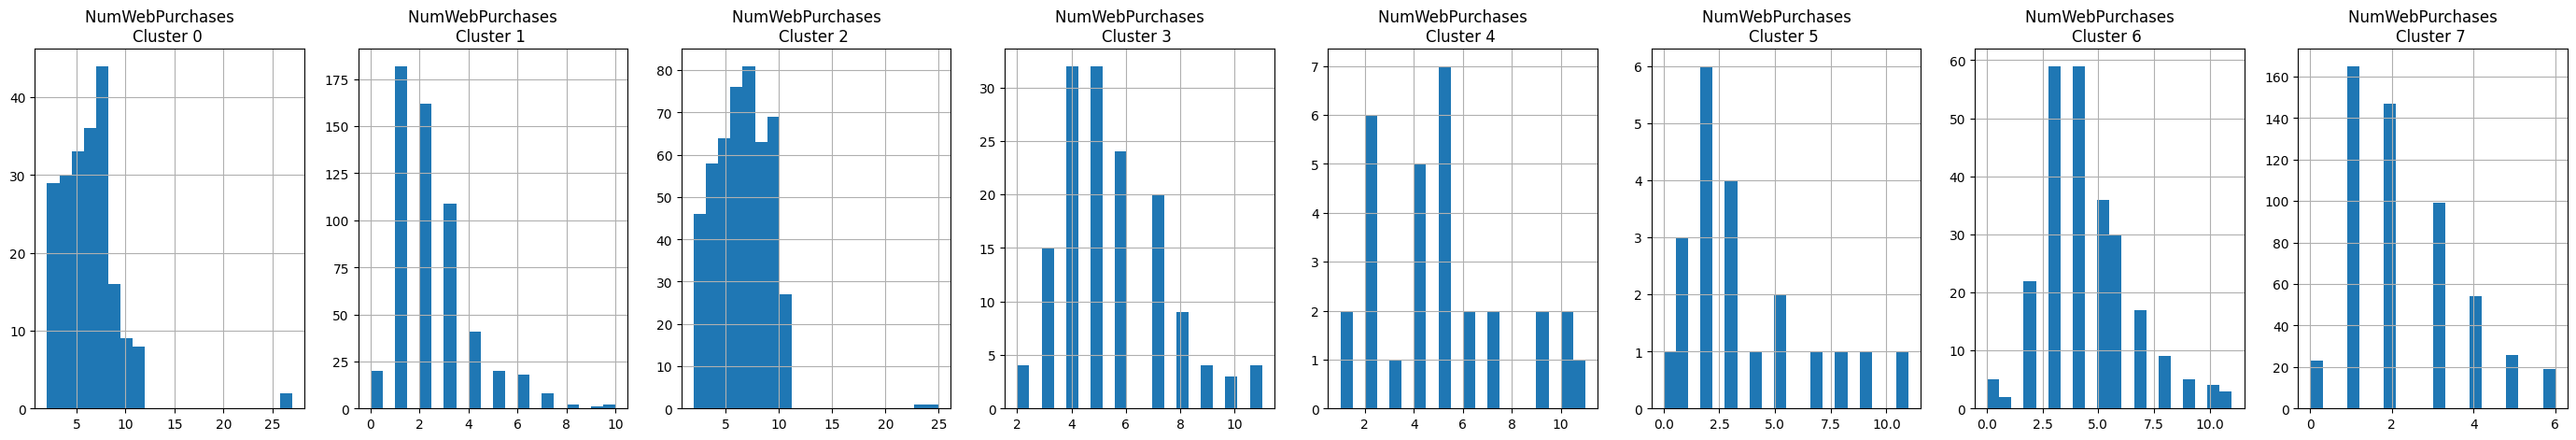

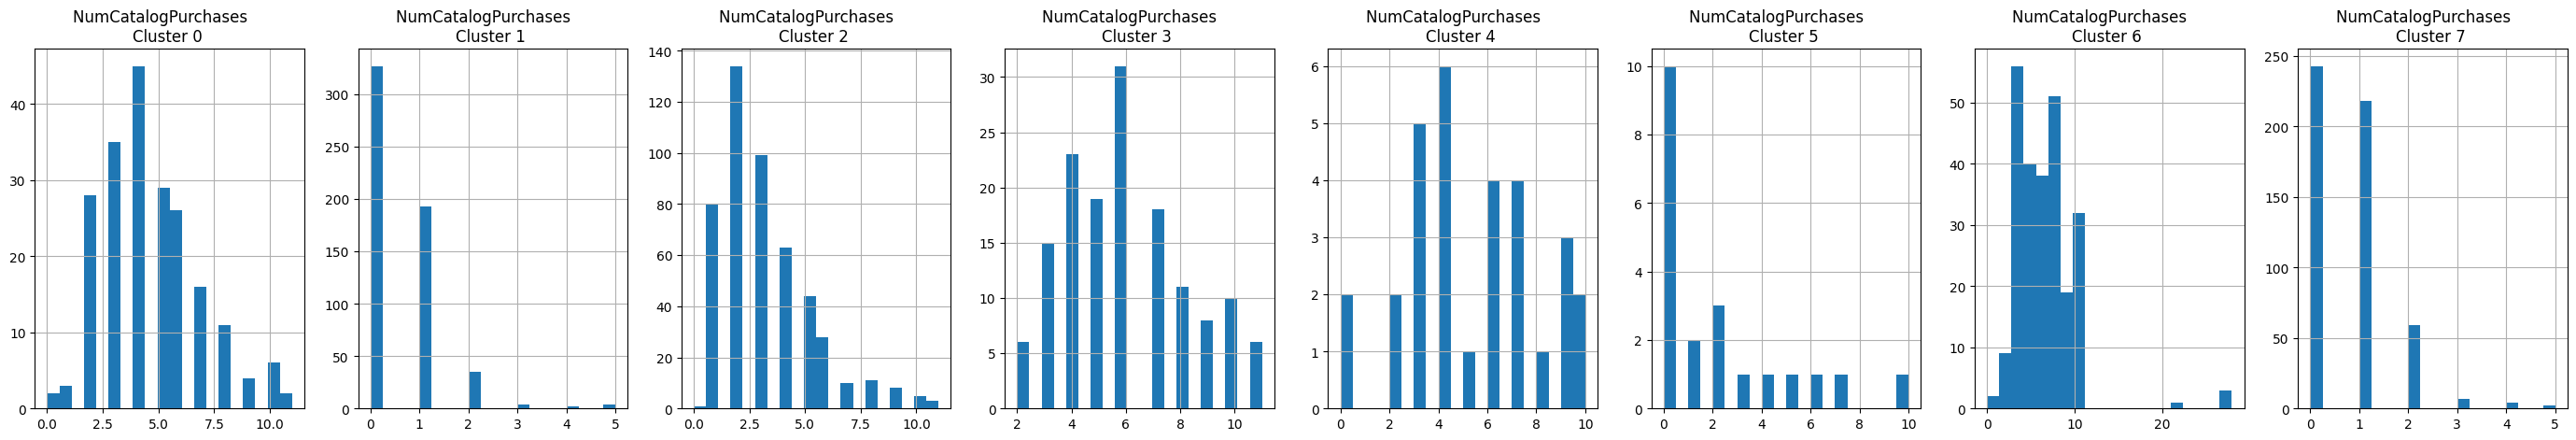

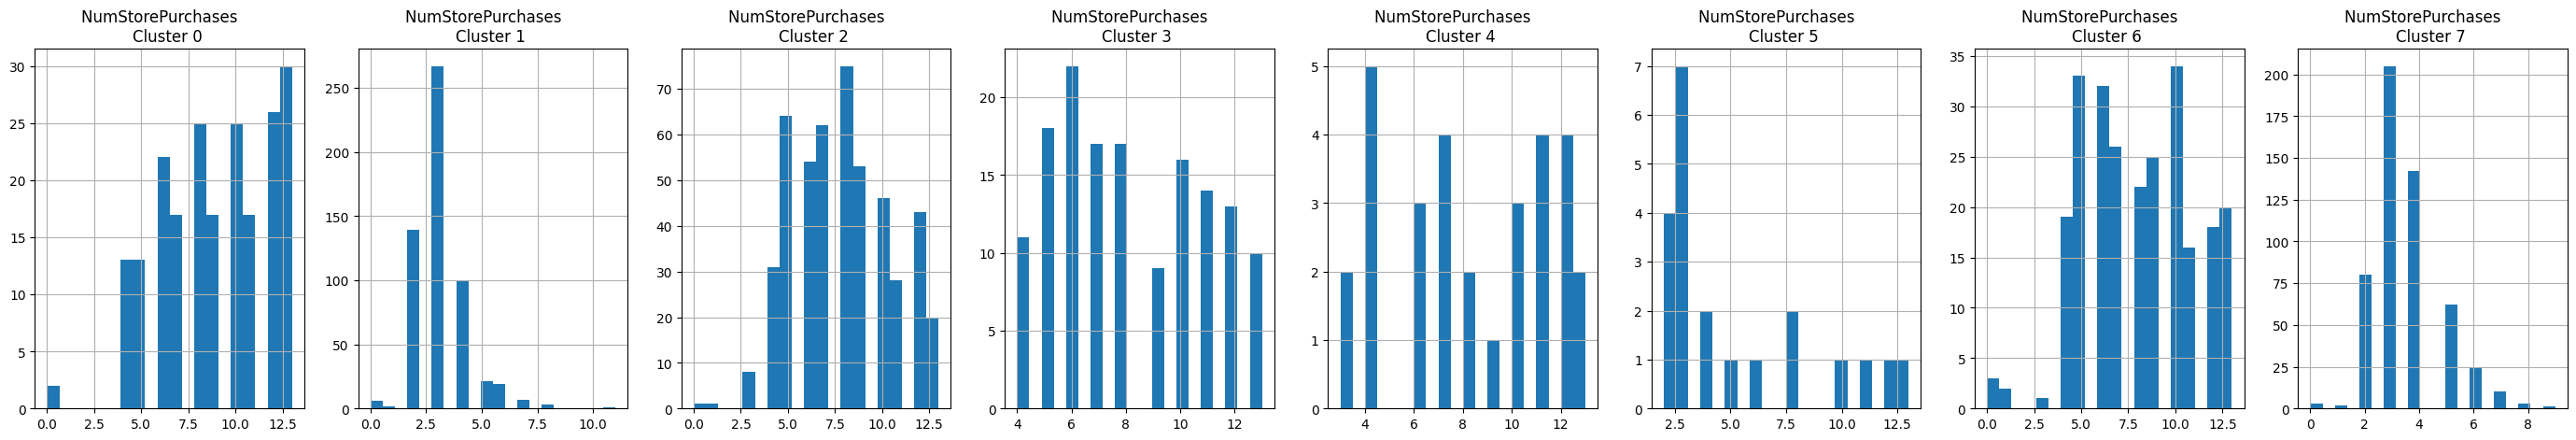

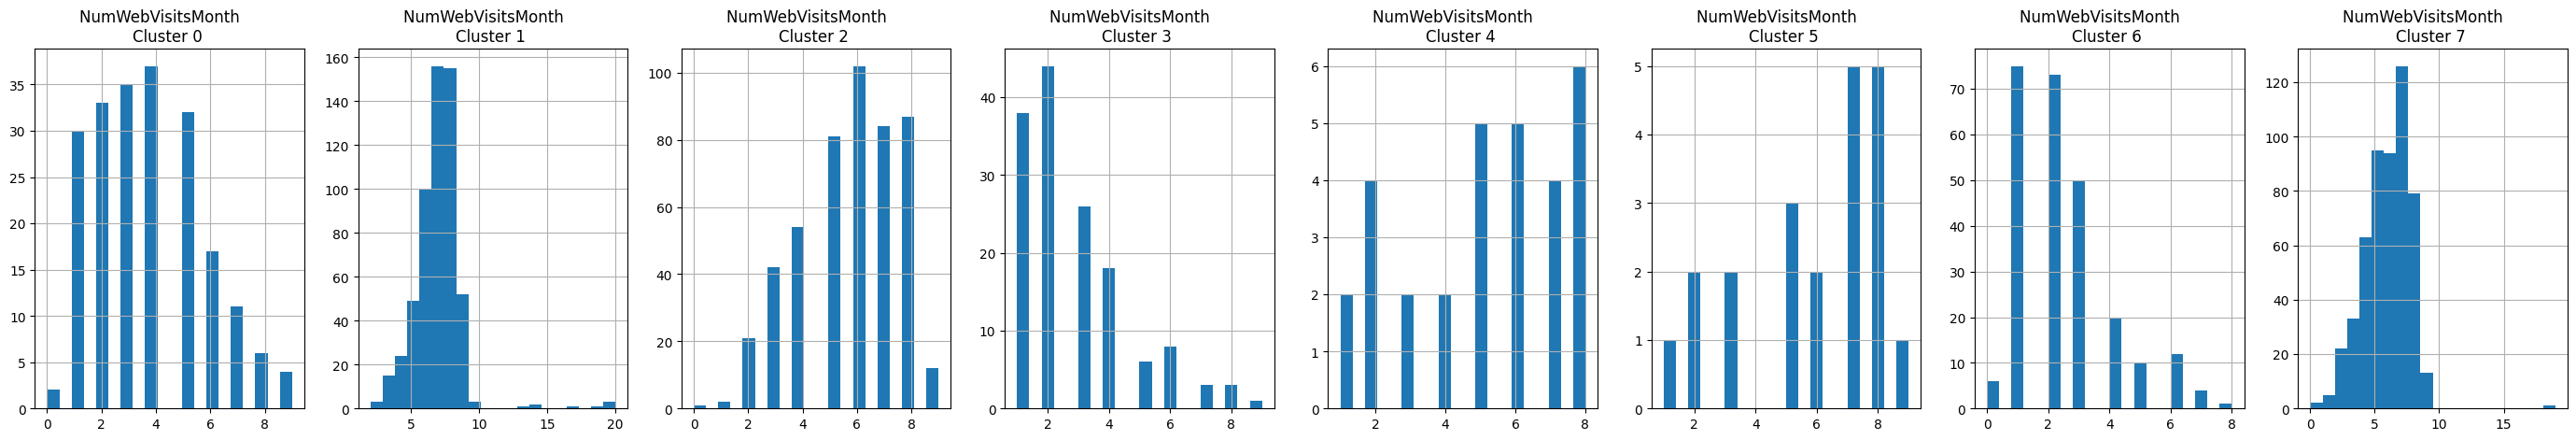

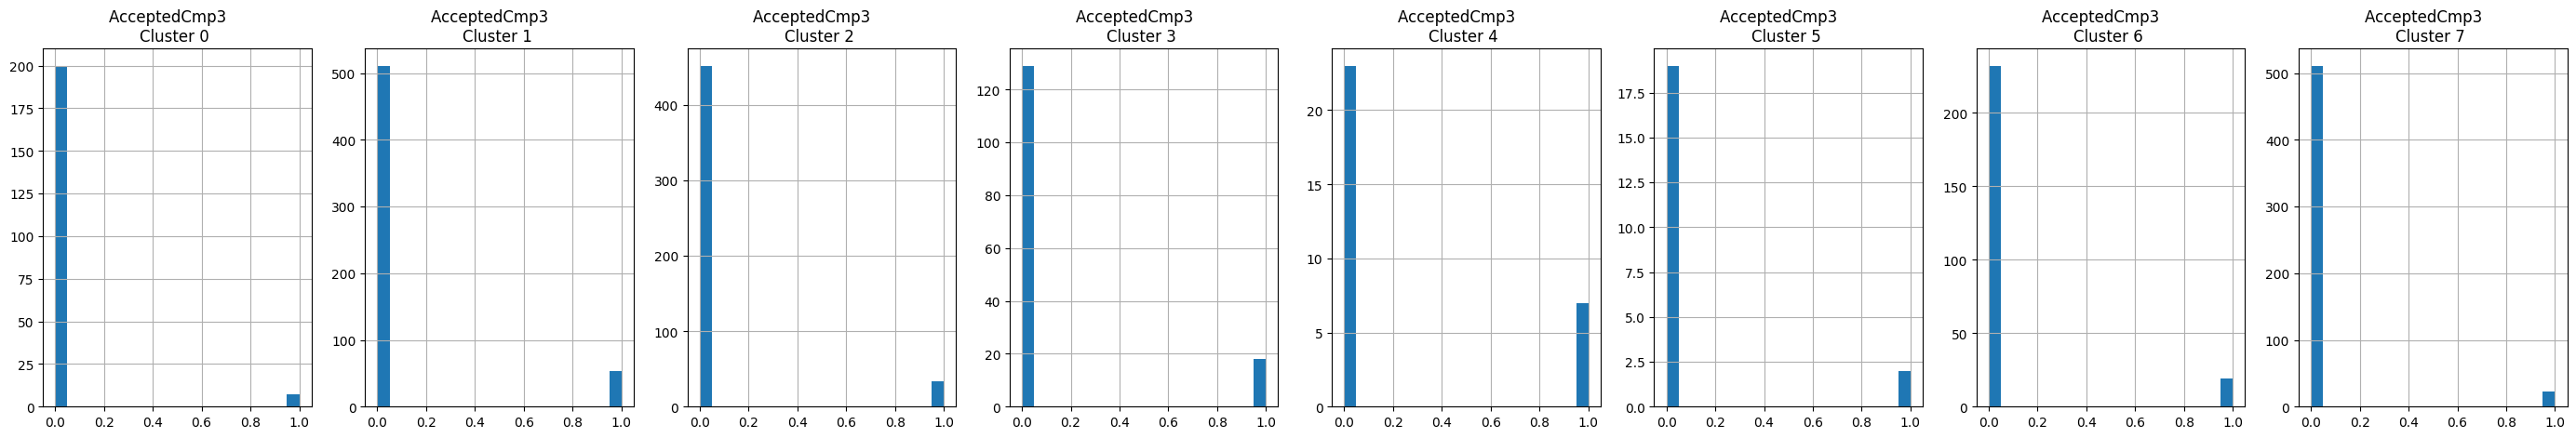

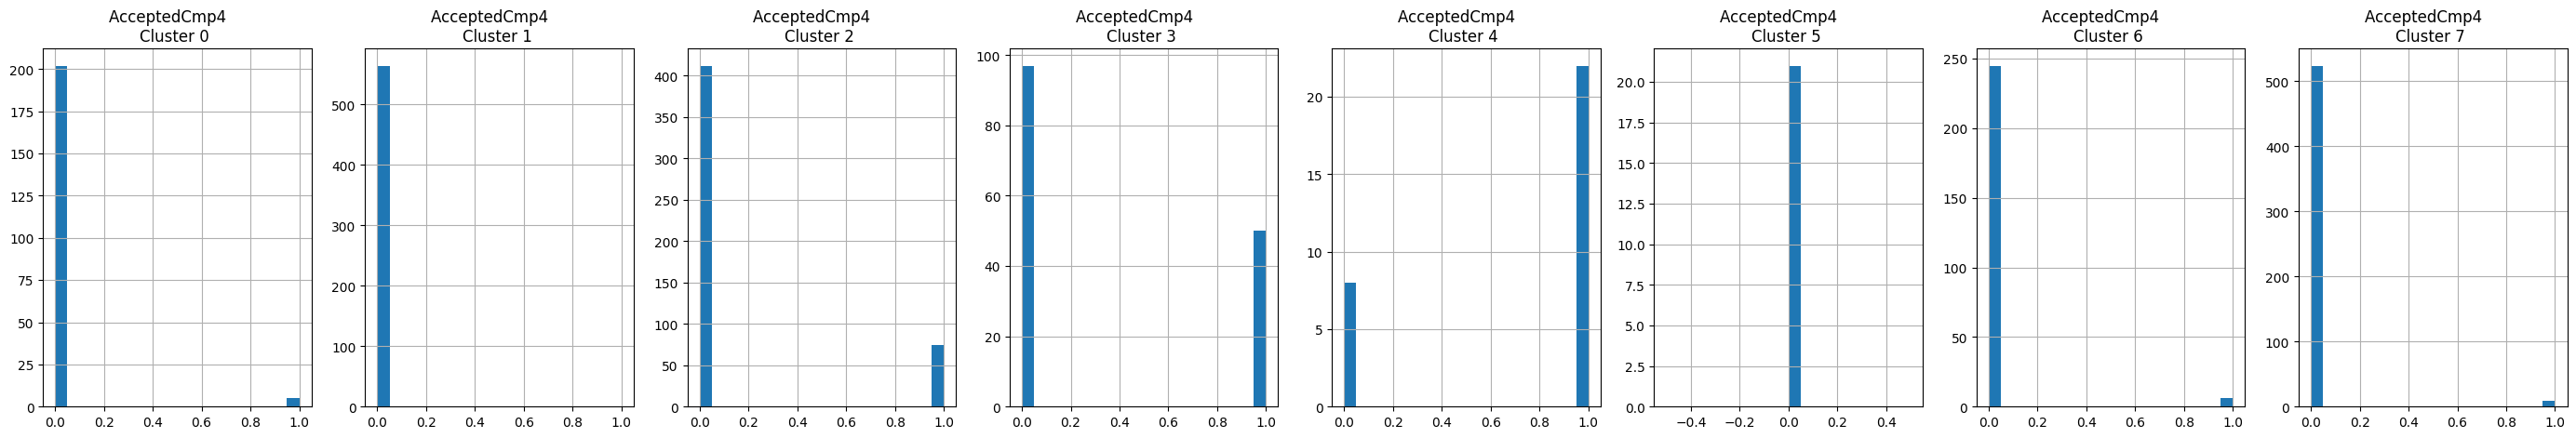

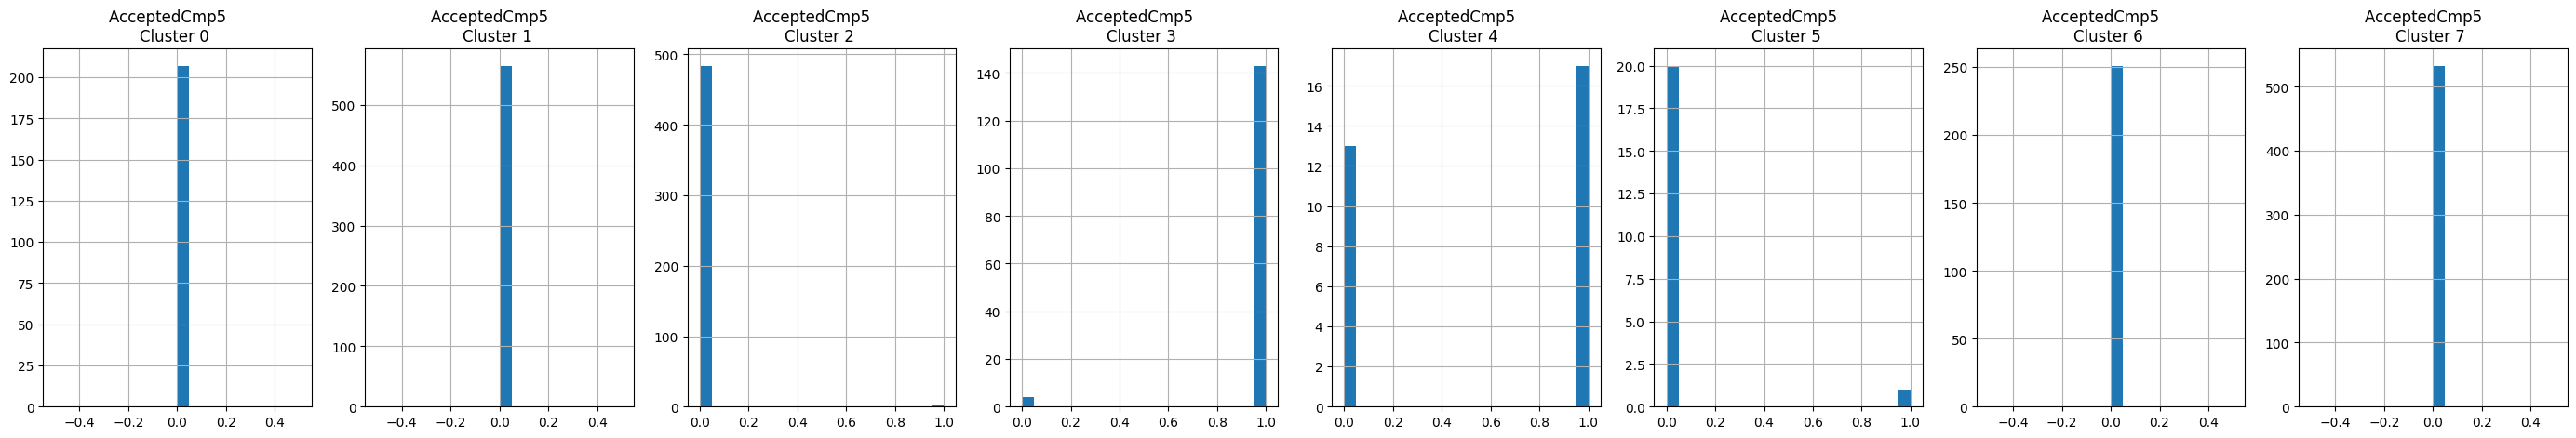

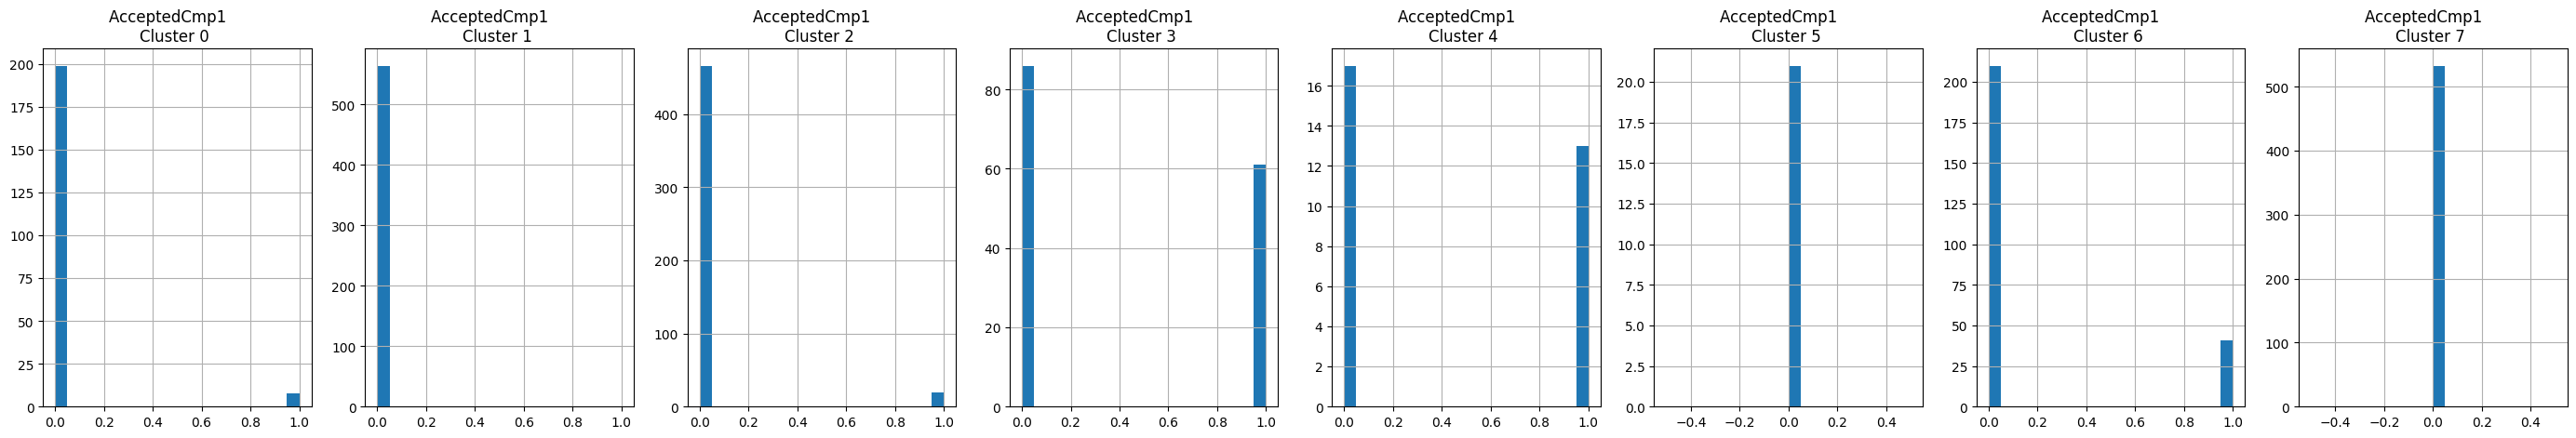

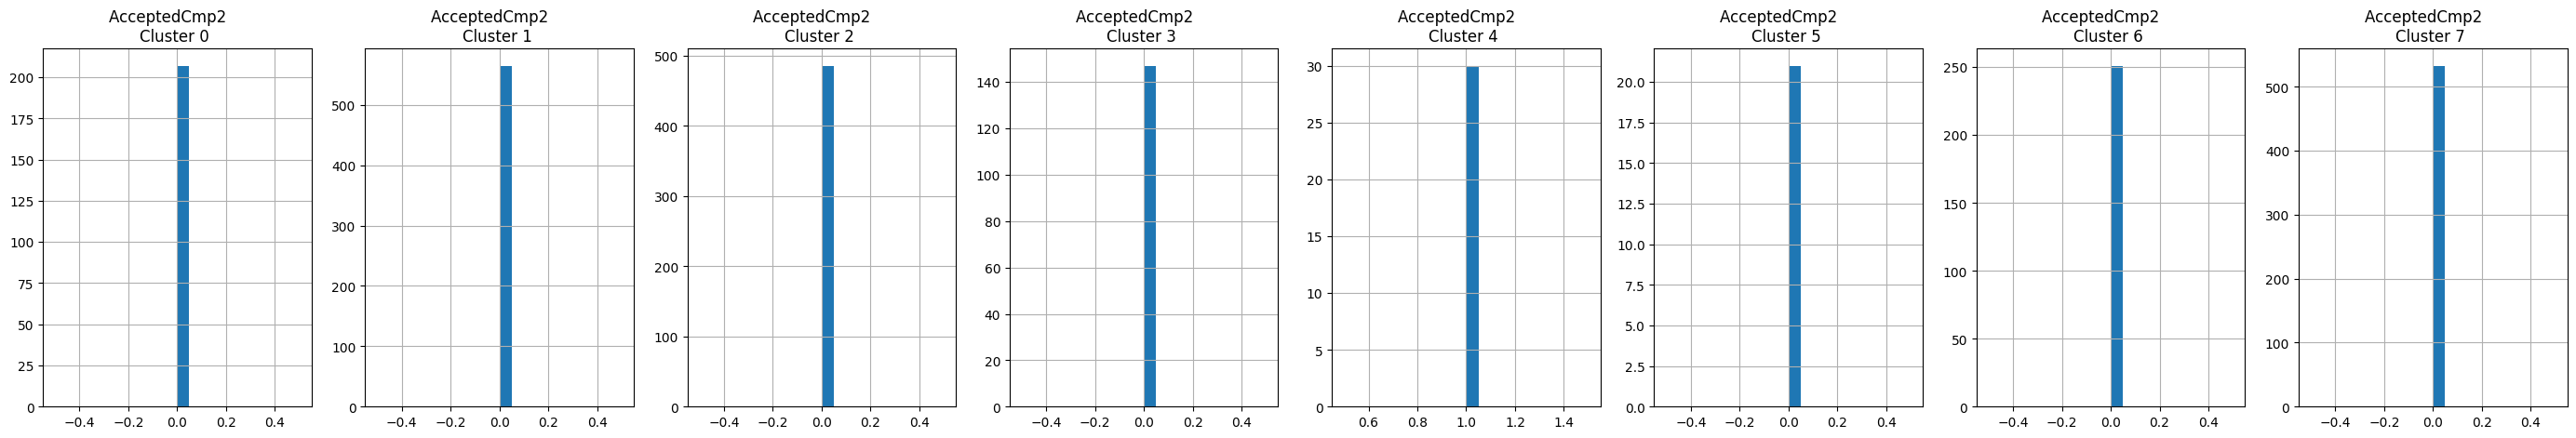

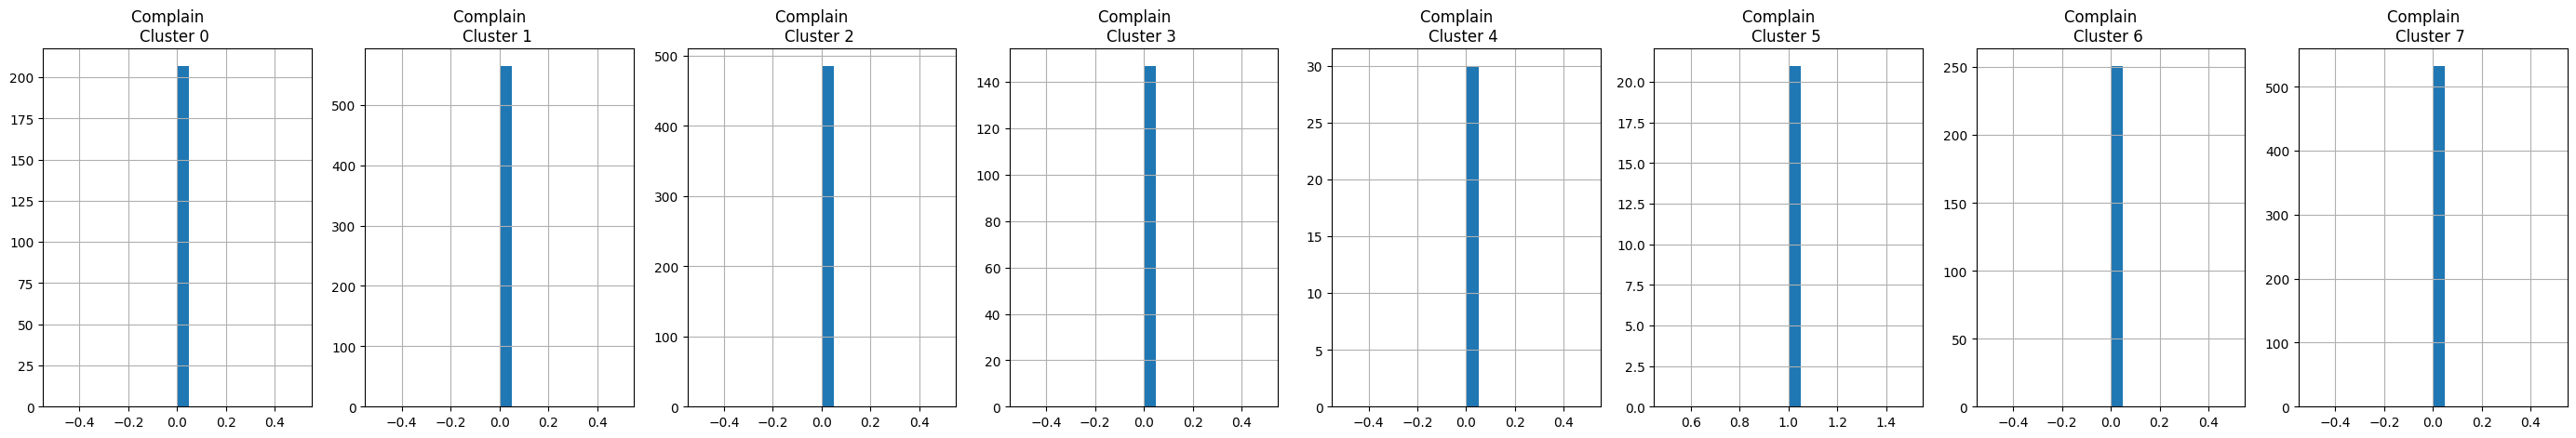

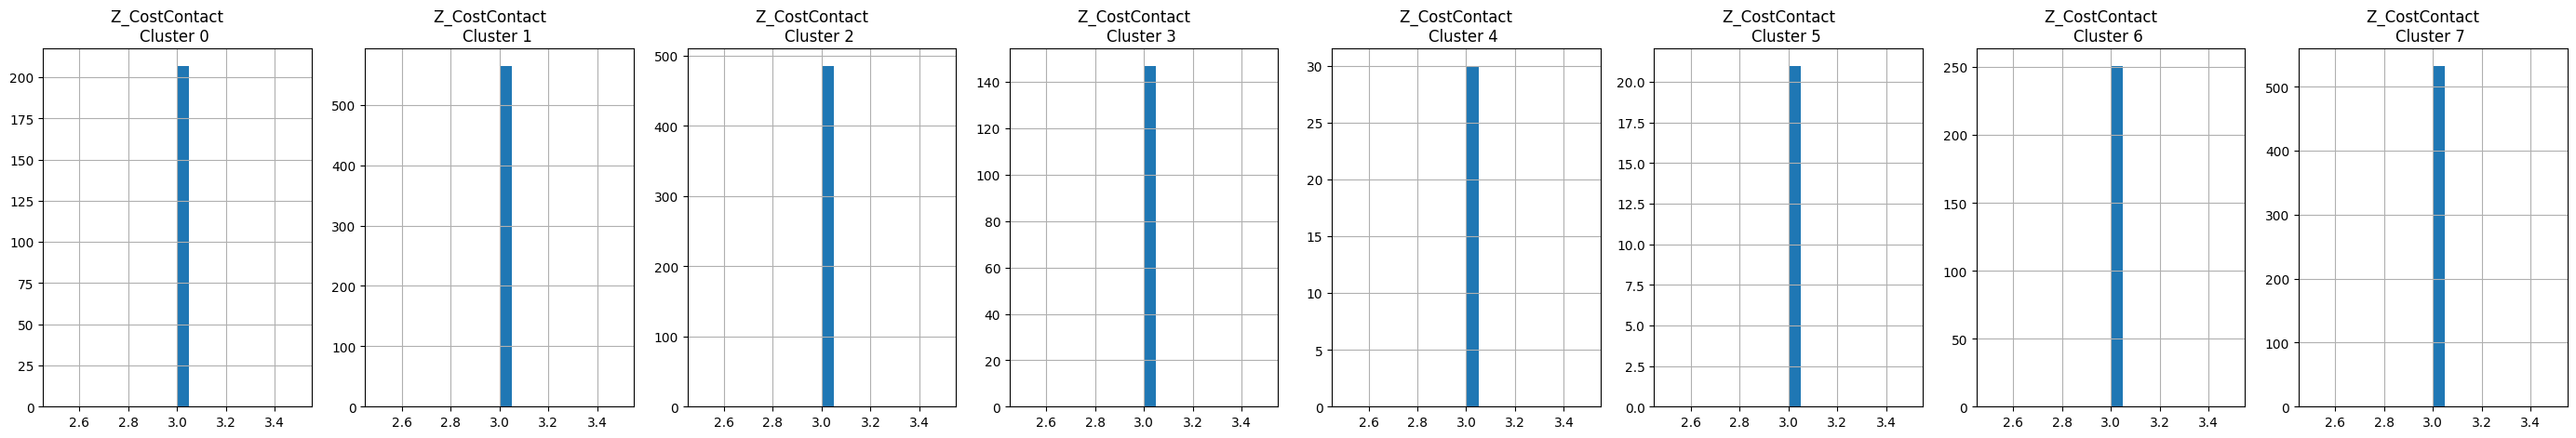

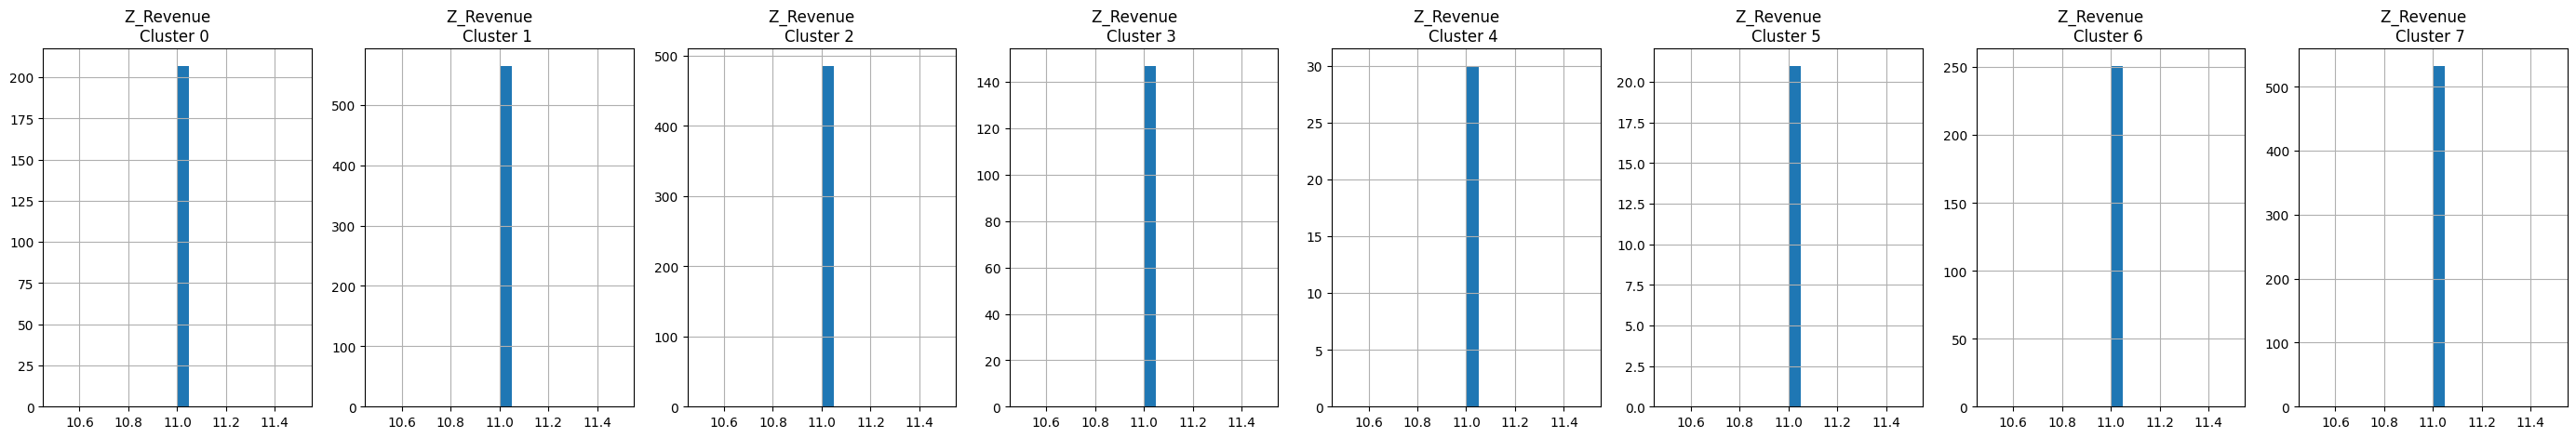

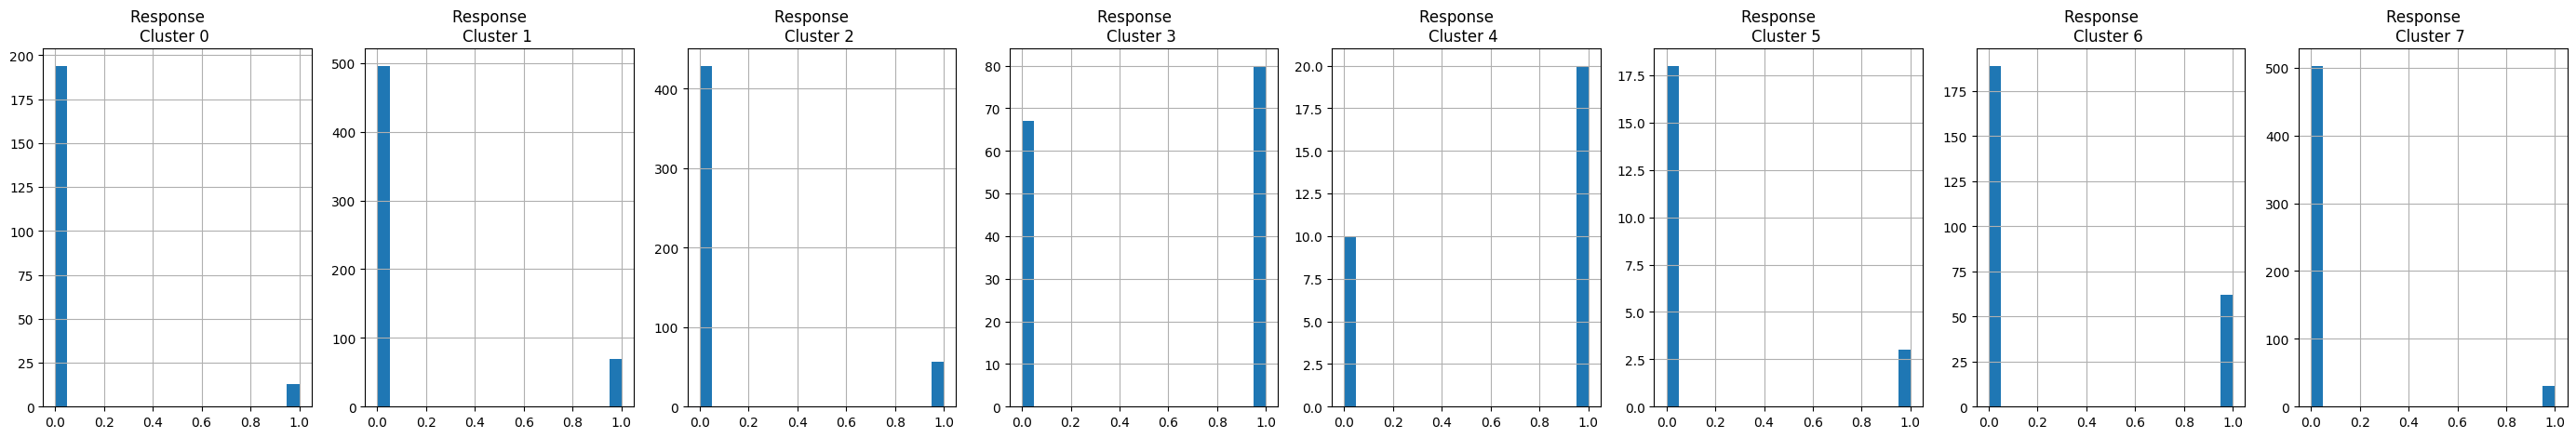

In [39]:
# Plot the histogram of various clusters
for i in df_final.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### Applying PCA

In [40]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[ 3.77574974, -0.24378149],
       [-2.3578327 ,  0.09110792],
       [ 1.63993261,  0.0771786 ],
       ...,
       [ 1.52103571,  0.20600271],
       [ 1.71810231,  1.19647504],
       [-1.66961307,  0.76126024]])

In [41]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,3.775750,-0.243781
1,-2.357833,0.091108
2,1.639933,0.077179
3,-2.487134,-1.412981
4,-0.450126,-0.085501


In [42]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,3.775750,-0.243781,6
1,-2.357833,0.091108,7
2,1.639933,0.077179,0
3,-2.487134,-1.412981,1
4,-0.450126,-0.085501,1


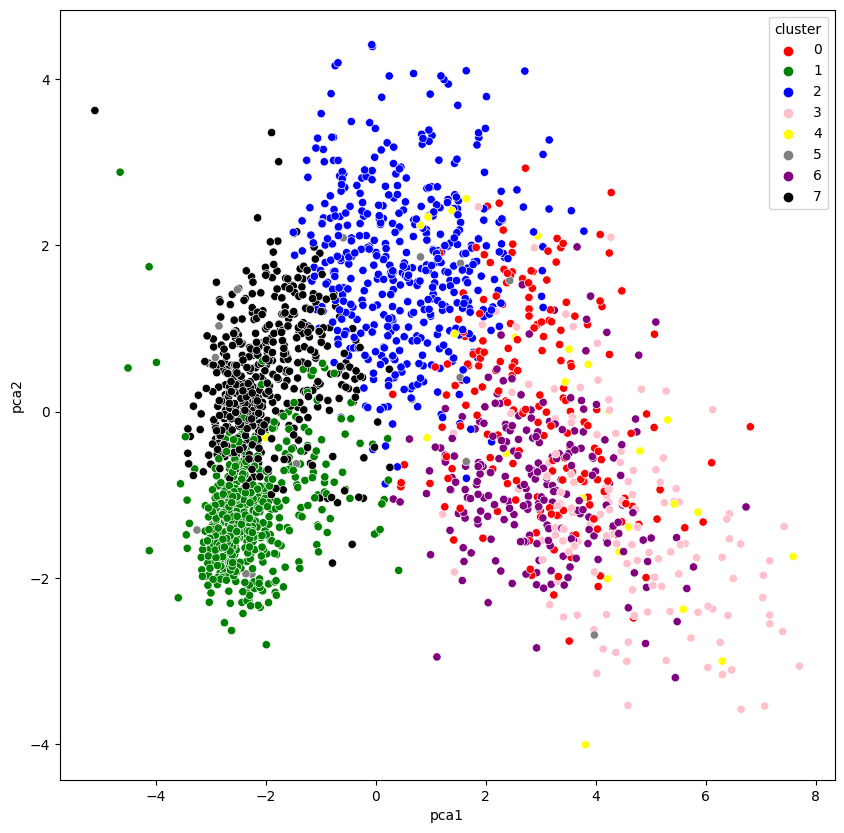

In [43]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

### Applying Autoencoders

In [47]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 8

input_df = Input(shape=(27,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(27, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [48]:
df_scaled.shape

(2240, 27)

In [49]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
18/18 [==============================] - 3s 96ms/step - loss: 0.8141
Epoch 2/25
18/18 [==============================] - 2s 93ms/step - loss: 0.6632
Epoch 3/25
18/18 [==============================] - 1s 58ms/step - loss: 0.5682
Epoch 4/25
18/18 [==============================] - 1s 60ms/step - loss: 0.5087
Epoch 5/25
18/18 [==============================] - 1s 58ms/step - loss: 0.4685
Epoch 6/25
18/18 [==============================] - 1s 57ms/step - loss: 0.4365
Epoch 7/25
18/18 [==============================] - 1s 57ms/step - loss: 0.4128
Epoch 8/25
18/18 [==============================] - 1s 58ms/step - loss: 0.3987
Epoch 9/25
18/18 [==============================] - 1s 58ms/step - loss: 0.3740
Epoch 10/25
18/18 [==============================] - 1s 58ms/step - loss: 0.3556
Epoch 11/25
18/18 [==============================] - 1s 58ms/step - loss: 0.3424
Epoch 12/25
18/18 [==============================] - 1s 79ms/step - loss: 0.3255
Epoch 13/25
18/18 [==================

In [50]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 27)]              0         
                                                                 
 dense_8 (Dense)             (None, 8)                 224       
                                                                 
 dense_9 (Dense)             (None, 500)               4500      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [51]:
autoencoder.save_weights('autoencoder.h5')

In [52]:
pred = encoder.predict(df_scaled)

70/70 [==============================] - 1s 12ms/step


In [53]:
pred.shape

(2240, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

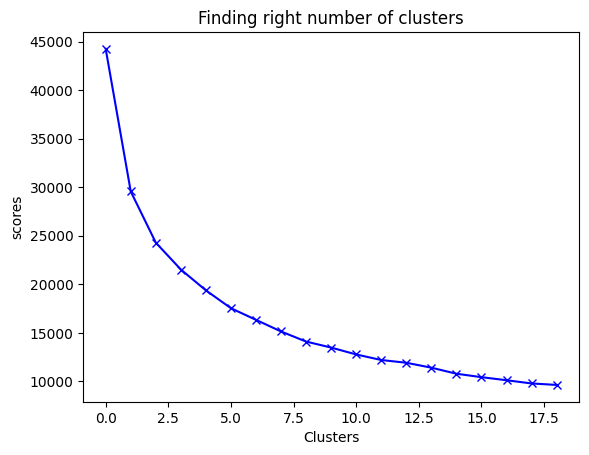

In [54]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

<ipython-input-55-a03cdc235775>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-55-a03cdc235775>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


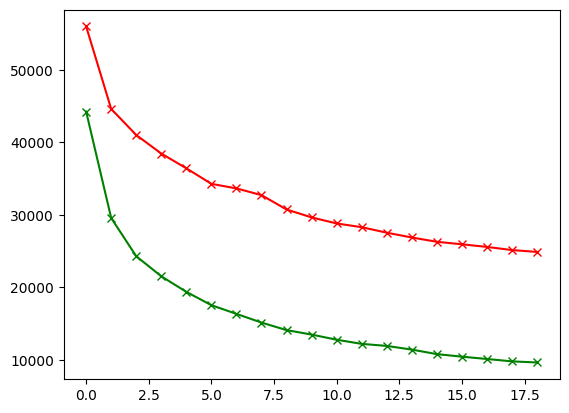

In [55]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [57]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
df_cluster_dr = pd.concat([df_final, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,1957,0,0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3
1,1954,0,0,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,1965,0,1,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2
3,1984,0,1,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2
4,1981,1,2,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2


In [60]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,3.841692,0.278258
1,-2.387612,0.375746
2,-2.444665,-1.391325
3,-2.435218,0.323720
4,-2.742444,-0.014399


In [61]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,3.841692,0.278258,3
1,-2.387612,0.375746,2
2,-2.444665,-1.391325,2
3,-2.435218,0.323720,2
4,-2.742444,-0.014399,2


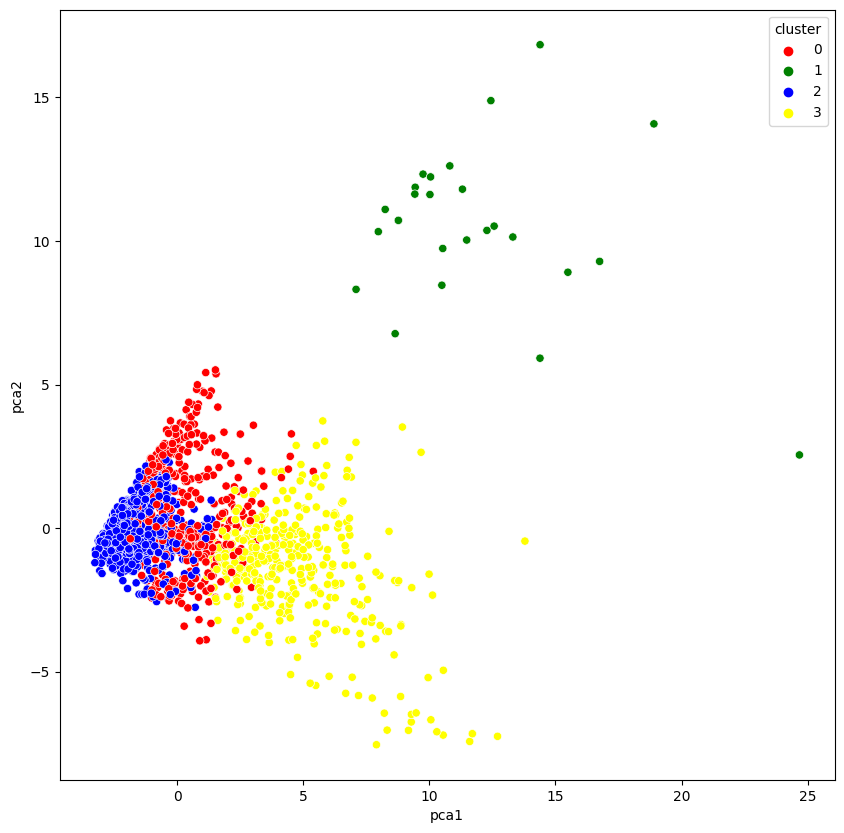

In [62]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()